**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
from time import time 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks 
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from pathlib import Path
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score

 
import warnings                                                      # importing warning library

# add graphs into jupiter notebook
%matplotlib inline                             
warnings.filterwarnings('ignore')                                    # for ignoring warnings in notebook

import statsmodels.api  as sm                        # importing statsmodel api
from sklearn import model_selection                                  # For model_selection

# getting methods for confusion matrix, F1 score, Accuracy Score
from sklearn import metrics 
from sklearn.model_selection import cross_val_score                                         
from sklearn.metrics  import confusion_matrix,f1_score,accuracy_score,classification_report,roc_curve,auc,average_precision_score
from sklearn.linear_model  import LogisticRegression    # For logistic Regression
from sklearn.naive_bayes  import GaussianNB            # For Naive Bayes classifier
from sklearn.neighbors    import KNeighborsClassifier  # For K-NN Classifier
from sklearn.svm  import SVC                   # For support vector machine based classifier

## Scaling
from sklearn.preprocessing import StandardScaler

import os


**Import CSV file from Repository**

In [ ]:
park=pd.read_csv('/content/Parkinsson_disease.csv')
park.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


**Getting to know the Data**

In [ ]:
park.shape

(195, 24)

In [ ]:
park.isnull().sum().sum()

0

In [ ]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
park.name.nunique()

195

In [ ]:
park.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
park.duplicated().sum()

0

In [ ]:
X=park
y=park['status']
X=X.drop(columns=["status",'name'])
print(X.shape,y.shape)

(195, 22) (195,)


**Check for imbalance data**

<Axes: xlabel='status', ylabel='count'>

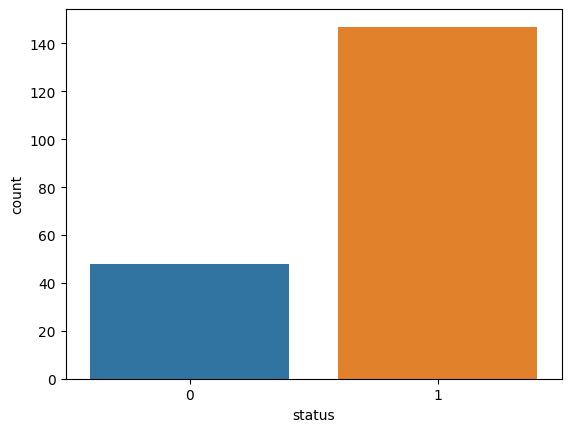

In [ ]:
sns.countplot(x="status", data=park)

In [ ]:
park.status.value_counts()

1    147
0     48
Name: status, dtype: int64

In [ ]:
print(str((147/(147+48))*100) + '% of the data have Parkinsons Disease with a ratio of 49:16')

75.38461538461539% of the data have Parkinsons Disease with a ratio of 49:16


**Feature Sampling**

Tomek Links

In [ ]:
ran_under=TomekLinks(sampling_strategy='not minority')
X_under, y_under= ran_under.fit_resample(X, y)
print(Counter(y_under))

Counter({1: 141, 0: 48})


**Random Over and Undersampling**

In [ ]:
ran_over = RandomOverSampler(sampling_strategy='minority',random_state=1)
X_over, y_over = ran_over.fit_resample(X, y)
print(Counter(y_over))

Counter({1: 147, 0: 147})


In [ ]:
ran_under = RandomUnderSampler(sampling_strategy='majority',random_state=1)
X_under, y_under= ran_under.fit_resample(X, y)
print(Counter(y_under))

Counter({0: 48, 1: 48})


In [ ]:
park_over=X_over.copy()
park_over['status']=y_over
park_under=X_under.copy()
park_under['status']=y_under

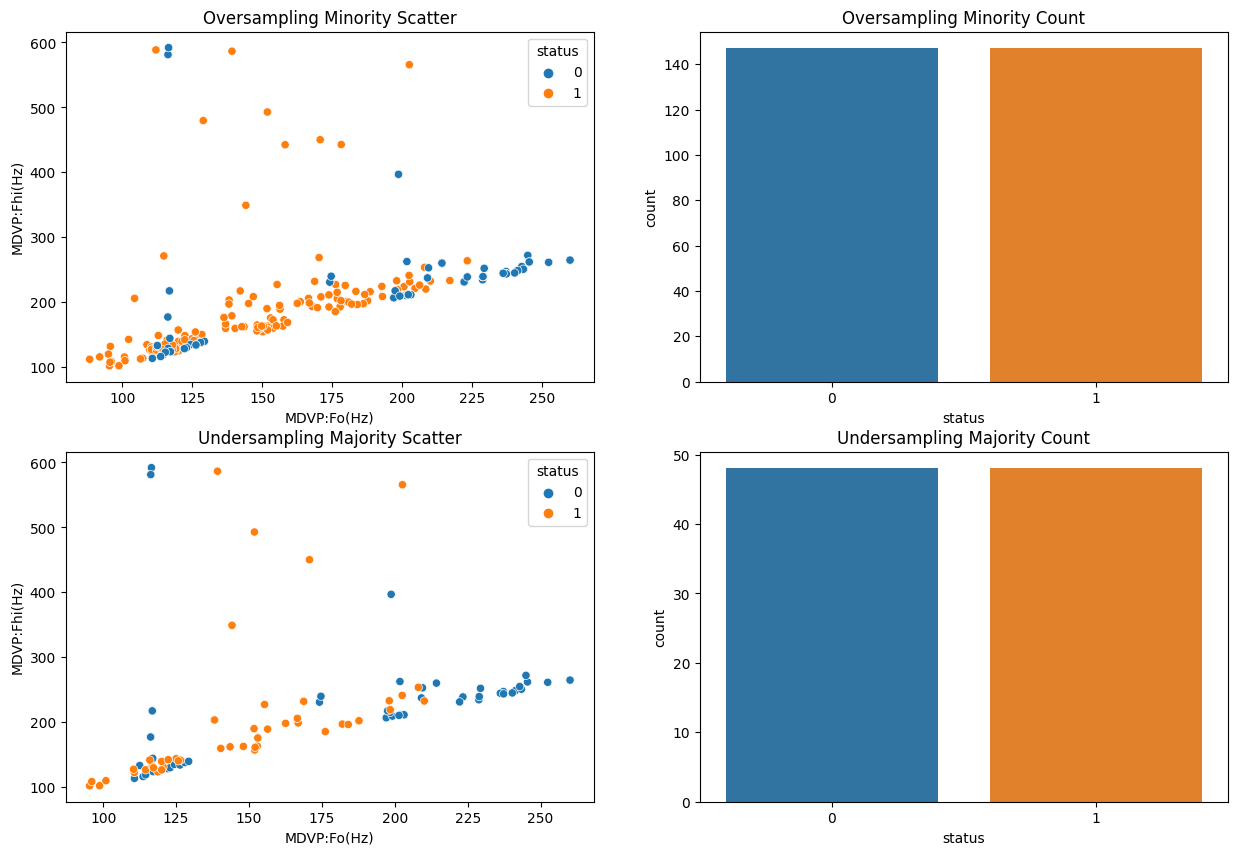

In [ ]:
figure, axis = plt.subplots(2, 2,figsize=(15,10))

sns.scatterplot(ax=axis[0,0],data=park_over,x='MDVP:Fo(Hz)',y='MDVP:Fhi(Hz)',hue='status')
axis[0, 0].set_title("Oversampling Minority Scatter")
  
sns.countplot(ax=axis[0, 1],x="status", data=park_over)
axis[0, 1].set_title("Oversampling Minority Count")
  
sns.scatterplot(ax=axis[1, 0],data=park_under,x='MDVP:Fo(Hz)',y='MDVP:Fhi(Hz)',hue='status')
axis[1, 0].set_title("Undersampling Majority Scatter")
  
sns.countplot(ax=axis[1, 1],x="status", data=park_under)
axis[1, 1].set_title("Undersampling Majority Count")
plt.show()

In [ ]:
park_over.duplicated().sum()

99

**Synthetic Minority Oversampling Technique(SMOTE): Another Oversampling Technique**

In [ ]:
sm = SMOTE(sampling_strategy='minority', random_state=1)
X_smote, y_smote= sm.fit_resample(X, y)
print(Counter(y_smote))

Counter({1: 147, 0: 147})


In [ ]:
X_smote.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
park_smote=X_smote.copy()
park_smote['status']=y_smote

[Text(0.5, 1.0, 'SMOTE Count')]

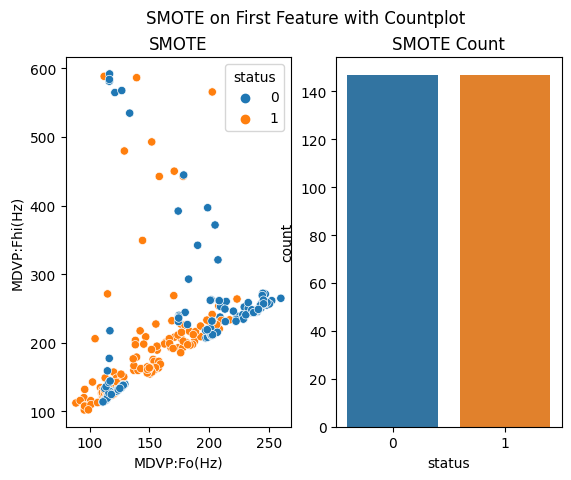

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('SMOTE on First Feature with Countplot')
sns.scatterplot(ax=ax1,data=park_smote,x='MDVP:Fo(Hz)',y='MDVP:Fhi(Hz)',hue='status').set(title='SMOTE')
sns.countplot(ax=ax2,x="status", data=park_smote).set(title='SMOTE Count')

**Feature Scaling**

In [ ]:
cols=X_smote.columns

Normalization

In [ ]:
norm_smote=pd.DataFrame(preprocessing.normalize(X_smote),columns=cols)
norm_over=pd.DataFrame(preprocessing.normalize(X_over),columns=cols)
norm_under=pd.DataFrame(preprocessing.normalize(X_under),columns=cols)

Scalling

In [ ]:
scale_under=pd.DataFrame(preprocessing.scale(X_under),columns=cols)
scale_over=pd.DataFrame(preprocessing.scale(X_over),columns=cols)
scale_smote=pd.DataFrame(preprocessing.scale(X_smote),columns=cols)

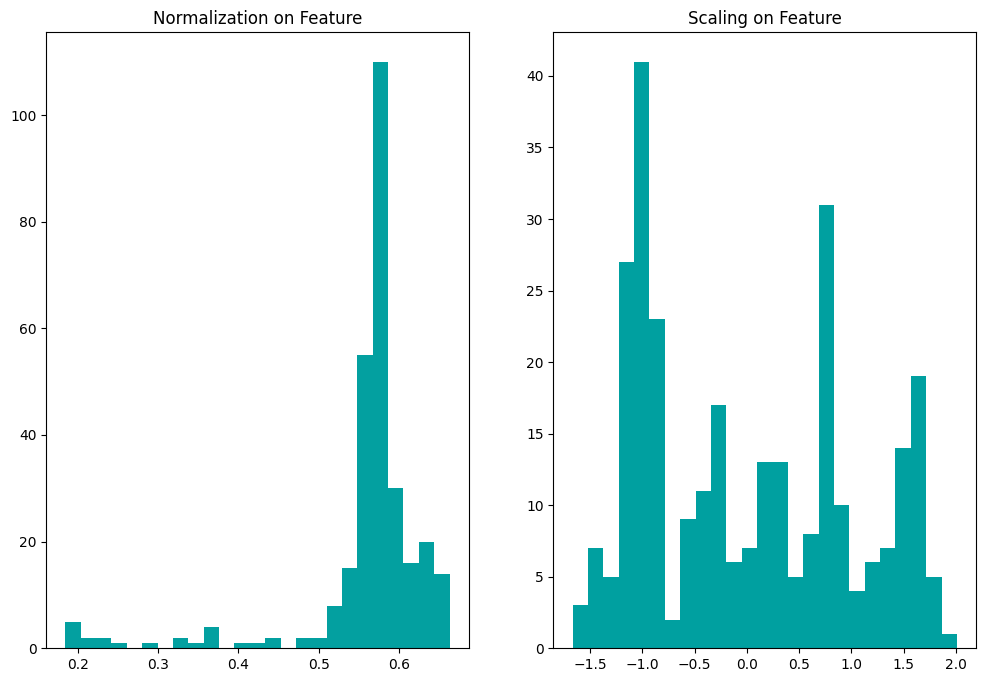

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(12,8))
axs[0].hist(norm_smote['MDVP:Fo(Hz)'], bins = 25, color = '#03A0A0')
axs[0].title.set_text('Normalization on Feature')
axs[1].hist(scale_smote['MDVP:Fo(Hz)'], bins = 25, color = '#00A0A0')
axs[1].title.set_text('Scaling on Feature')

Feature Skewness after first model

**Model Prediction**

Predict using all different data created using three different classifiers

In [ ]:
# level0 = list()
# level0.append(('lr', LogisticRegression(random_state=47)))
# level0.append(('knn', KNeighborsClassifier(n_neighbors = 29, weights = 'uniform', metric='euclidean')))
# level0.append(('cart', DecisionTreeClassifier()))
# level0.append(('svm', SVC(gamma=0.05, C=27,random_state=47)))
# level0.append(('bayes', GaussianNB()))
# level0.append(('dnn1',MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=1000)))
# level0.append(('dnn2',MLPRegressor(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=1000)))
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
clf1 = LogisticRegression(random_state=47,solver='newton-cg')
clf2 = KNeighborsClassifier(n_neighbors = 29, weights = 'distance', metric='euclidean')
clf3 =  DecisionTreeClassifier(criterion= 'gini', max_depth= 8, min_samples_leaf= 1, min_samples_split= 4,random_state=47 )
clf4 = SVC(gamma='scale', C=70,random_state=47,kernel='rbf',degree=2)
clf5 = GaussianNB()
clf6 = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=1000)
clf7 = MLPRegressor(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=1000)

# Define the meta-classifier
meta_clf = SVC(gamma=0.05, C=2,random_state=47)
# model2 = MLPRegressor(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=1000)
# level0.append(('rfc',RandomForestClassifier(n_estimators = 100,criterion='entropy',max_features=10,random_state=47)))
# level0.append(('ada',AdaBoostClassifier( n_estimators= 50)))
# define meta learner model

# level1 = SVC(gamma=0.05, C=2,random_state=47)
def predictmodels(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
  print("Training set has {} samples.".format(X_train.shape[0]))
  print("Testing set has {} samples.".format(X_test.shape[0]))
  print()
  clf_A = RandomForestClassifier(random_state=3)
  clf_B = DecisionTreeClassifier(random_state=3)
  clf_C = AdaBoostClassifier(random_state=3)
  clf_D = LogisticRegression(random_state=3)
  clf_E = KNeighborsClassifier(n_neighbors = 29, weights = 'uniform', metric='euclidean')
  clf_F = SVC(gamma=0.04, C=70,random_state=47,probability=True)
  clf_G = RandomForestClassifier(n_estimators = 100,criterion='entropy',max_features=10,random_state=47)
  


# define the stacking ensemble with cross validation of 5
  # clf_H = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  clf_H = StackingClassifier(estimators=[('clf1', clf1), ('clf2', clf2),('clf3', clf3),('clf4', clf4),('clf5', clf5),('clf6', clf6),('clf7', clf7),],
    final_estimator=meta_clf)
   


  results = {}
  for clf in [clf_A, clf_B, clf_C,clf_D,clf_E,clf_F,clf_G,clf_H]:
      clf_name = clf.__class__.__name__
      results[clf_name] = {}
      results[clf_name] = \
      results = {}
      start = time()
      clf = clf.fit(X_train, y_train)
      end = time()
      results['train_time'] = end-start
        
      start = time()
      predictions_test = clf.predict(X_test)
      end = time()
      print(clf)
      print('prediction_time: ' + str(end-start))
      # print('Accuracy Score: ' + str(accuracy_score(y_test,predictions_test)))
      # print('fb Score: '+ str(fbeta_score(y_test,predictions_test,beta=0.5)))
      cm = confusion_matrix(y_test, predictions_test)
      print('Confusion matrix: ')
      print(cm)
      sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
      plt.xlabel('Predicted')
      plt.ylabel('Actual')
      plt.title('Confusion Matrix')
      plt.show()
      print()
      # plot ROC curve
      if(clf==clf_H):
        y_pred_prob = clf.decision_function(X_test)
      else:
        y_pred_prob = clf.predict_proba(X_test)[:,1]
      fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
      roc_auc = auc(fpr, tpr)

      plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
      plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('Receiver operating characteristic')
      plt.legend(loc="lower right")
      plt.show()
      print("Classification Report")
      classRep = classification_report(y_test, predictions_test, digits=2)
      print(classRep)
      print()
  return X_train, X_test, y_train, y_test

Using Best classifer used in the function above to further tune it to increase Accuracy



In [ ]:
def Gridsrch(clf,n):
  if n==1:
    parameters={'n_estimators':[80,120,150],'min_samples_leaf':[1,2,3]}
  elif n==2:
    clf1 = LogisticRegression(random_state=0,solver='newton-cg')
    clf2 = KNeighborsClassifier(n_neighbors = 29, weights = 'distance', metric='euclidean')
    clf3 = DecisionTreeClassifier(criterion= 'gini', max_depth= 8, min_samples_leaf= 1, min_samples_split= 4,random_state=47 )
    clf4 = SVC(gamma='scale', C=70,random_state=47,kernel='rbf',degree=2)
    clf5 = GaussianNB()
    clf6 = MLPRegressor(hidden_layer_sizes=(64,32),max_iter=1000)
    clf7 = MLPRegressor(hidden_layer_sizes=(128,64),max_iter=1000)

    estimators = [('clf1', clf1),                  ('clf2', clf2),                  ('clf3', clf3),                  ('clf4', clf4),                  ('clf5', clf5),                  ('clf6', clf6),                  ('clf7', clf7)]

    meta_clf = SVC(C=2,gamma=0.05,random_state=47)

    parameters={
        'estimators': [estimators],
        'final_estimator': [meta_clf],
        'cv': [5]
    }

  else:
    parameters={'n_estimators':[200,300,400],'learning_rate':[1.0,1.2,1.8]}

  scorer=make_scorer(fbeta_score,beta=0.1)

  grid_layout=GridSearchCV(clf,parameters,scoring=scorer)

  grid_fit=grid_layout.fit(X_train,y_train)

  best_clf=grid_fit.best_estimator_

  #predict using plane and optimized model
  predictions=(clf.fit(X_train,y_train).predict(X_test))
  best_predictions=best_clf.predict(X_test)
  # print(str(clf) +" before Optimization: fbeta_score is " + str(fbeta_score(y_test,predictions,beta=0.5)))
  # print(str(clf) +" before Optimization: Accuracy is " + str(accuracy_score(y_test,predictions)))

  print(str(clf) +" fbeta_score is  " + str(fbeta_score(y_test,best_predictions,beta=0.5)))
  print(str(clf) +" Accuracy is  " + str(accuracy_score(y_test,best_predictions)))
  classRep = classification_report(y_test, best_predictions, digits=2)
  print(classRep)


  print(grid_fit.best_params_)
  # print(grid_fit)
  return grid_fit


Training set has 235 samples.
Testing set has 59 samples.

RandomForestClassifier(random_state=3)
prediction_time: 0.017255067825317383
Confusion matrix: 
[[31  1]
 [ 2 25]]


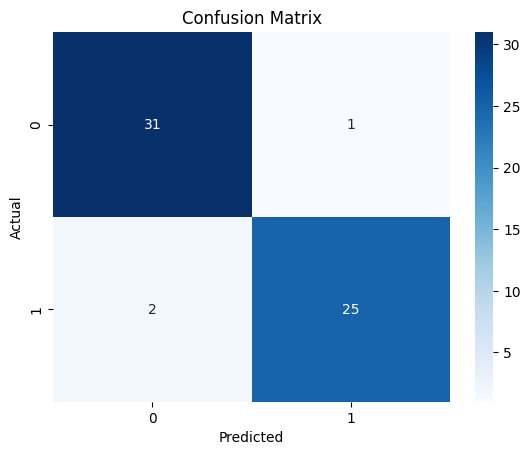

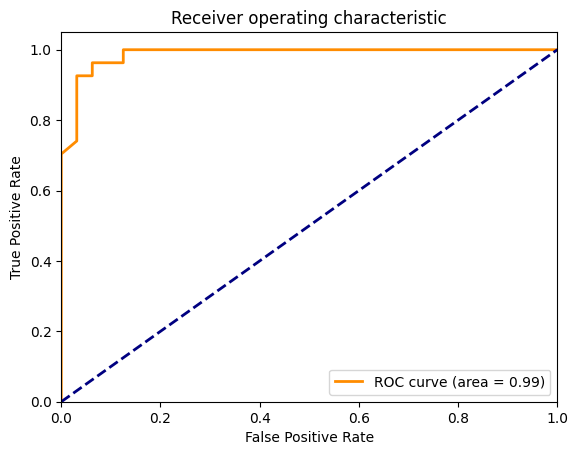

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        32
           1       0.96      0.93      0.94        27

    accuracy                           0.95        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.95      0.95      0.95        59


DecisionTreeClassifier(random_state=3)
prediction_time: 0.0013723373413085938
Confusion matrix: 
[[29  3]
 [ 3 24]]


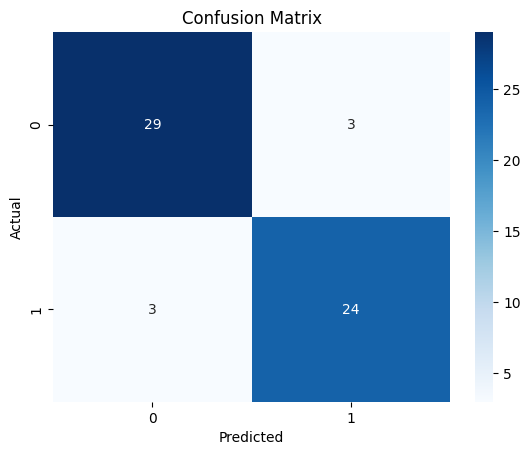

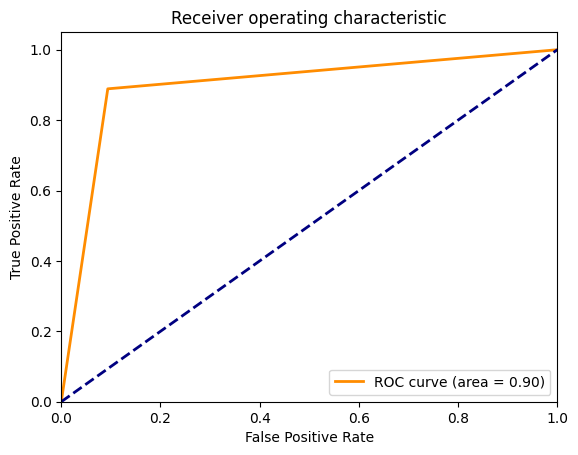

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        32
           1       0.89      0.89      0.89        27

    accuracy                           0.90        59
   macro avg       0.90      0.90      0.90        59
weighted avg       0.90      0.90      0.90        59


AdaBoostClassifier(random_state=3)
prediction_time: 0.008764028549194336
Confusion matrix: 
[[31  1]
 [ 4 23]]


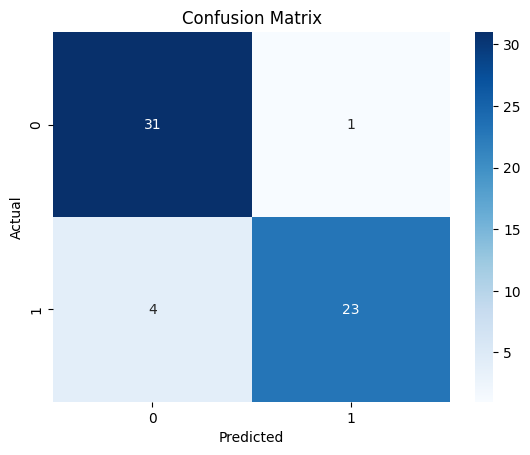

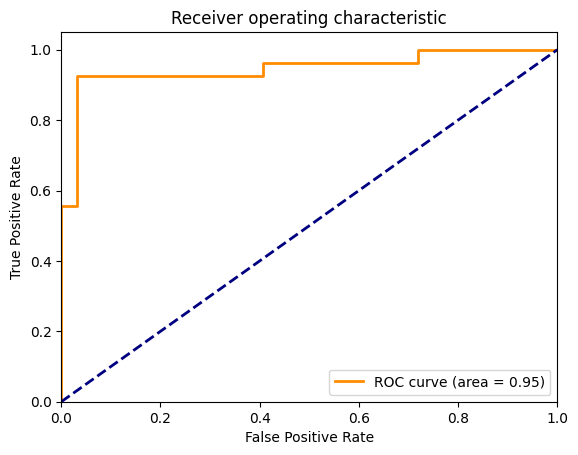

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        32
           1       0.96      0.85      0.90        27

    accuracy                           0.92        59
   macro avg       0.92      0.91      0.91        59
weighted avg       0.92      0.92      0.91        59


LogisticRegression(random_state=3)
prediction_time: 0.0016336441040039062
Confusion matrix: 
[[24  8]
 [ 7 20]]


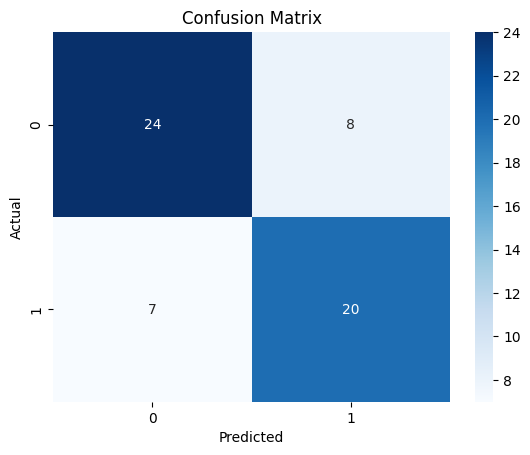

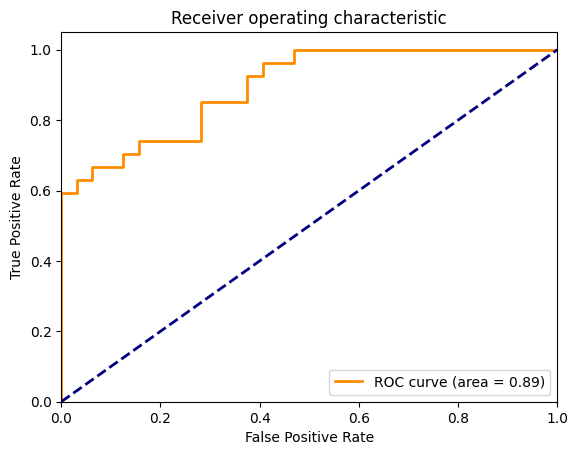

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.75      0.76        32
           1       0.71      0.74      0.73        27

    accuracy                           0.75        59
   macro avg       0.74      0.75      0.74        59
weighted avg       0.75      0.75      0.75        59


KNeighborsClassifier(metric='euclidean', n_neighbors=29)
prediction_time: 0.008598804473876953
Confusion matrix: 
[[31  1]
 [ 8 19]]


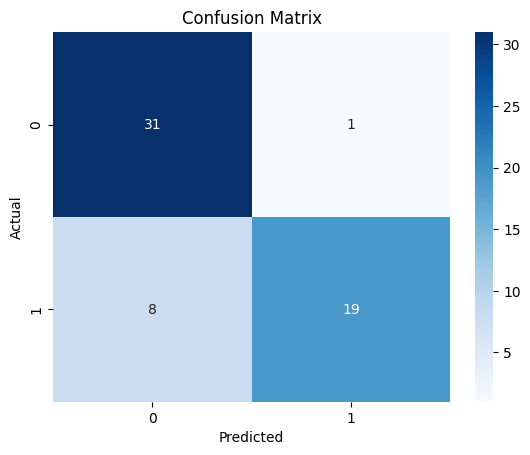

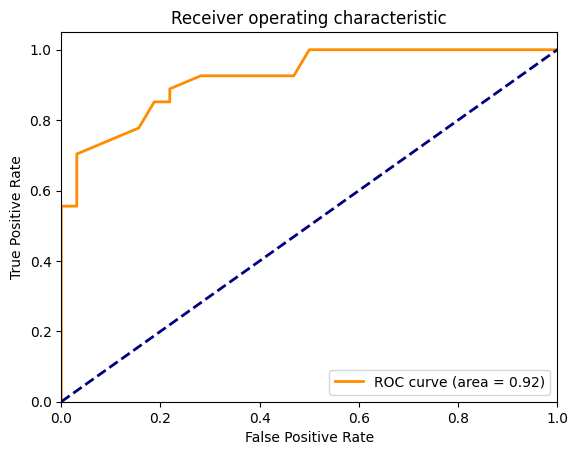

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        32
           1       0.95      0.70      0.81        27

    accuracy                           0.85        59
   macro avg       0.87      0.84      0.84        59
weighted avg       0.87      0.85      0.84        59


SVC(C=70, gamma=0.04, probability=True, random_state=47)
prediction_time: 0.0018608570098876953
Confusion matrix: 
[[31  1]
 [ 3 24]]


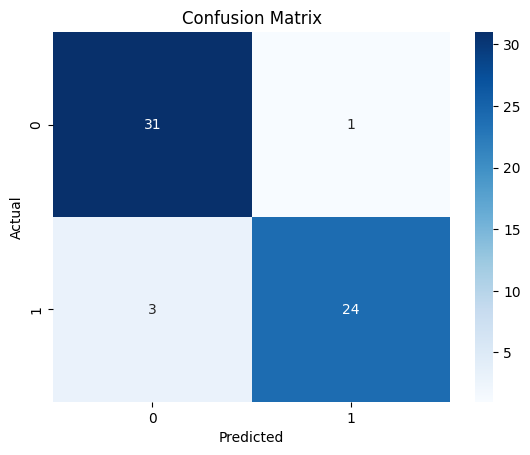

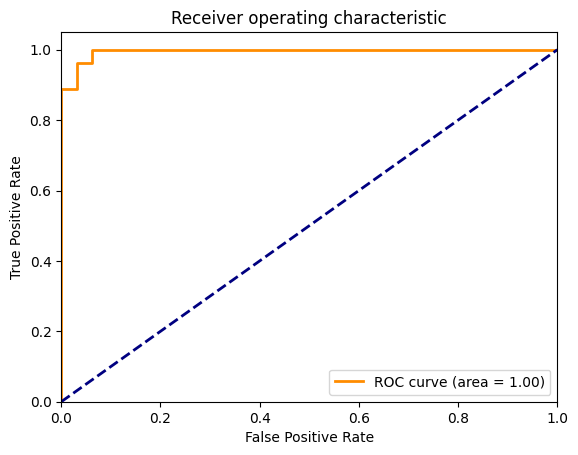

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        32
           1       0.96      0.89      0.92        27

    accuracy                           0.93        59
   macro avg       0.94      0.93      0.93        59
weighted avg       0.93      0.93      0.93        59


RandomForestClassifier(criterion='entropy', max_features=10, random_state=47)
prediction_time: 0.011199712753295898
Confusion matrix: 
[[31  1]
 [ 2 25]]


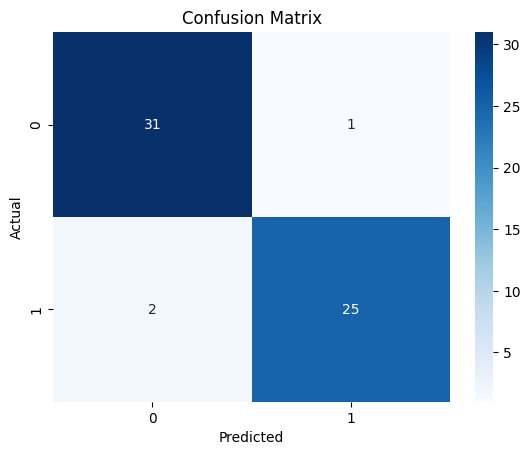

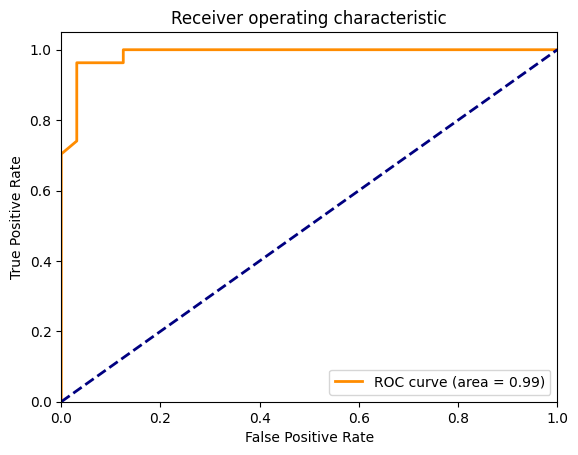

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        32
           1       0.96      0.93      0.94        27

    accuracy                           0.95        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.95      0.95      0.95        59


StackingClassifier(estimators=[('clf1',
                                LogisticRegression(random_state=47,
                                                   solver='newton-cg')),
                               ('clf2',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=29,
                                                     weights='distance')),
                               ('clf3',
                                DecisionTreeClassifier(max_depth=8,
                                                       min_samples_split=4,
                            

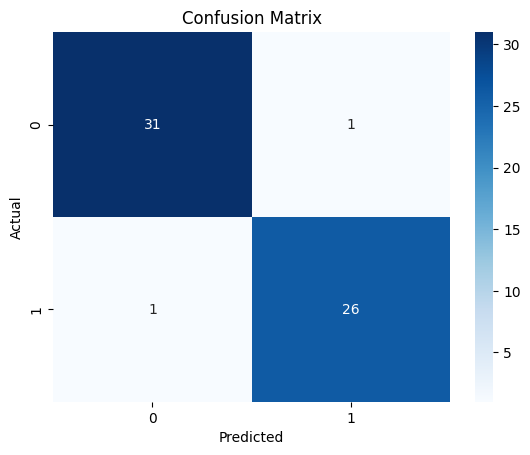

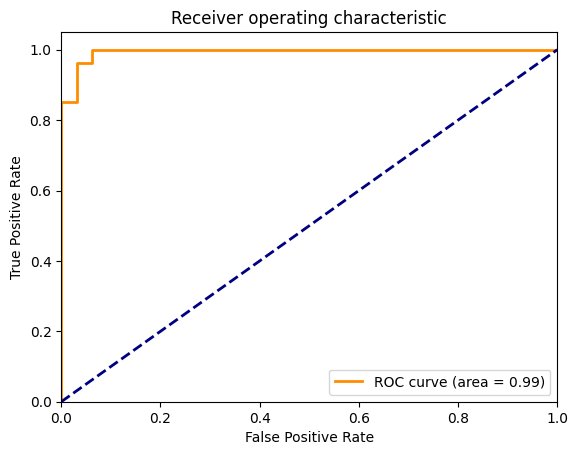

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.96      0.96      0.96        27

    accuracy                           0.97        59
   macro avg       0.97      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59




In [ ]:
X_train, X_test, y_train, y_test=predictmodels(scale_smote,y_smote)


In [ ]:
# # for stacking classifiers:
# clf1 = LogisticRegression(random_state=47)
# clf2 = KNeighborsClassifier(n_neighbors = 29, weights = 'uniform', metric='euclidean')
# clf3 = DecisionTreeClassifier()
# clf4 = SVC(gamma=0.05, C=27,random_state=47)
# clf5 = GaussianNB()
# clf6 = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=1000)
# clf7 = MLPRegressor(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=1000)
# estimators=[('clf1', clf1), ('clf2', clf2),('clf3', clf3),('clf4', clf4),('clf5', clf5),('clf6', clf6),('clf7', clf7),],

# # Define the meta-classifier
# meta_clf = SVC(gamma=0.05, C=2,random_state=47) 
# stacking_clf = StackingClassifier( estimators=estimators,
#     final_estimator=['meta_clf',meta_clf])
# # Define the hyperparameter grid
# param_grid = {
#     'clf1': [0.1, 1, 10],
#     'clf2': [0.1, 1, 10],
#     'clf3': [0.1, 1, 10],
#     'clf4': [0.1, 1, 10],
#     'clf5': [0.1, 1, 10],
#     'clf6': [0.1, 1, 10],
#     'clf7': [0.1, 1, 10],
#     'final_estimator__C': [0.1, 1, 10]
# }



In [ ]:
from sklearn.model_selection import KFold
Gridsrch(RandomForestClassifier(random_state=3),1)
Gridsrch(StackingClassifier(estimators=[('clf1', LogisticRegression(random_state=47)),
                               ('clf2',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=29)),
                               ('clf3', DecisionTreeClassifier()),
                               ('clf4', SVC(C=27, gamma=0.05, random_state=47)),
                               ('clf5', GaussianNB()),
                               ('clf6',
                                MLPRegressor(hidden_layer_sizes=(64, 32),
                                             max_iter=1000)),
                               ('clf7',
                                MLPRegressor(hidden_layer_sizes=(128, 64),
                                             max_iter=1000))],
                   final_estimator=SVC(C=2, gamma=0.05, random_state=47)),2)

# GridSearchCV(stacking_clf, param_grid=param_grid, cv=5, n_jobs=-1)

RandomForestClassifier(random_state=3) fbeta_score is  0.9541984732824427
RandomForestClassifier(random_state=3) Accuracy is  0.9491525423728814
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        32
           1       0.96      0.93      0.94        27

    accuracy                           0.95        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.95      0.95      0.95        59

{'min_samples_leaf': 1, 'n_estimators': 80}
StackingClassifier(estimators=[('clf1', LogisticRegression(random_state=47)),
                               ('clf2',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=29)),
                               ('clf3', DecisionTreeClassifier()),
                               ('clf4', SVC(C=27, gamma=0.05, random_state=47)),
                               ('clf5', GaussianNB()),
                   

GridSearchCV(estimator=StackingClassifier(estimators=[('clf1',
                                                       LogisticRegression(random_state=47)),
                                                      ('clf2',
                                                       KNeighborsClassifier(metric='euclidean',
                                                                            n_neighbors=29)),
                                                      ('clf3',
                                                       DecisionTreeClassifier()),
                                                      ('clf4',
                                                       SVC(C=27, gamma=0.05,
                                                           random_state=47)),
                                                      ('clf5', GaussianNB()),
                                                      ('clf6',
                                                       MLPRegressor(hidden_layer_sizes=(64,
                                                                                        32),
                                                                    max_iter=1000)),
                                                      ('clf7',
                                                       MLPRegressor...
                                          DecisionTreeClassifier(max_depth=8,
                                                                 min_samples_split=4,
                                                                 random_state=47)),
                                         ('clf4',
                                          SVC(C=70, degree=2, random_state=47)),
                                         ('clf5', GaussianNB()),
                                         ('clf6',
                                          MLPRegressor(hidden_layer_sizes=(64,
                                                                           32),
                                                       max_iter=1000)),
                                         ('clf7',
                                          MLPRegressor(hidden_layer_sizes=(128,
                                                                           64),
                                                       max_iter=1000))]],
                         'final_estimator': [SVC(C=2, gamma=0.05,
                                                 random_state=47)]},
             scoring=make_scorer(fbeta_score, beta=0.1))

fbeta score using Scale Smote: 0.9541984732824427

Training set has 235 samples.
Testing set has 59 samples.

RandomForestClassifier(random_state=3)
prediction_time: 0.01270294189453125
Confusion matrix: 
[[32  0]
 [ 2 25]]


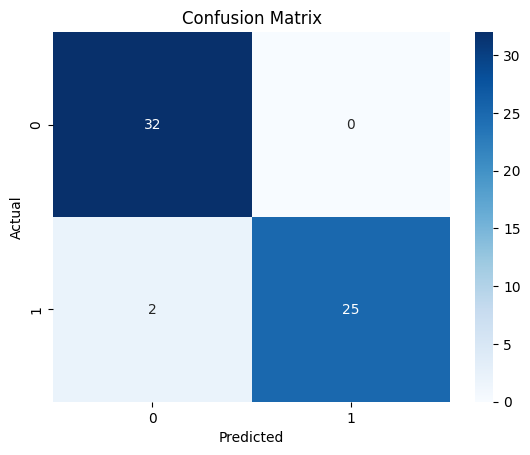

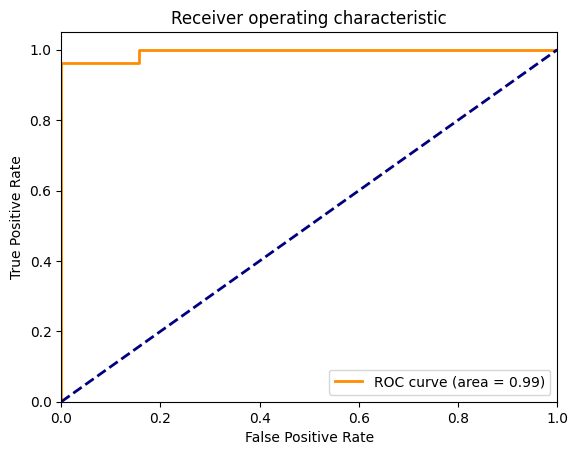

Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        32
           1       1.00      0.93      0.96        27

    accuracy                           0.97        59
   macro avg       0.97      0.96      0.97        59
weighted avg       0.97      0.97      0.97        59


DecisionTreeClassifier(random_state=3)
prediction_time: 0.002896547317504883
Confusion matrix: 
[[32  0]
 [ 4 23]]


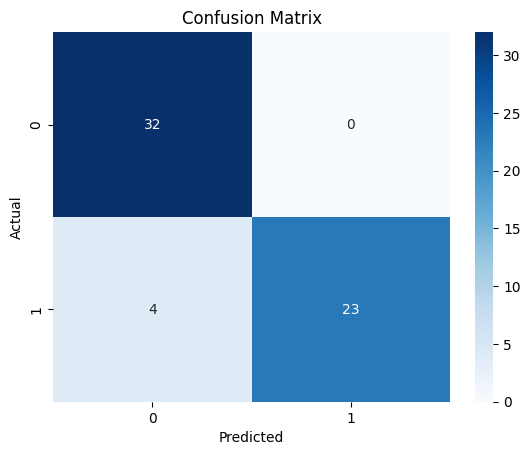

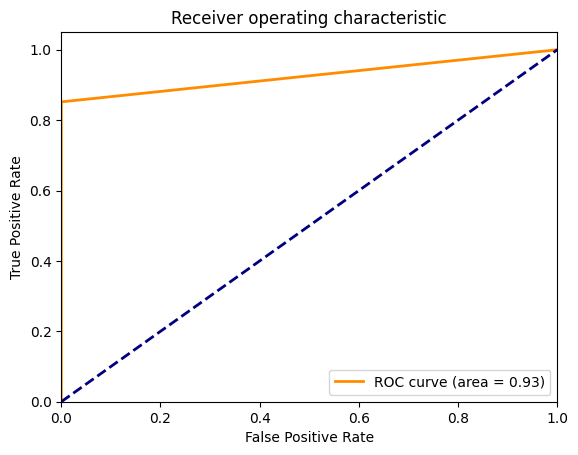

Classification Report
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        32
           1       1.00      0.85      0.92        27

    accuracy                           0.93        59
   macro avg       0.94      0.93      0.93        59
weighted avg       0.94      0.93      0.93        59


AdaBoostClassifier(random_state=3)
prediction_time: 0.009254693984985352
Confusion matrix: 
[[32  0]
 [ 2 25]]


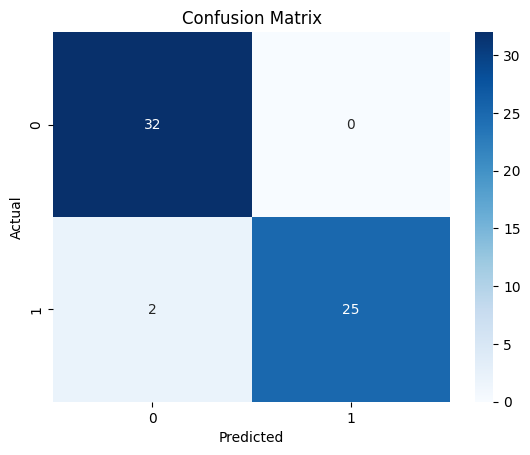

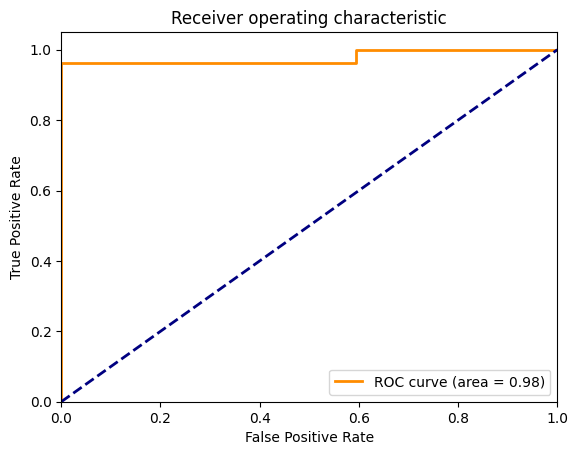

Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        32
           1       1.00      0.93      0.96        27

    accuracy                           0.97        59
   macro avg       0.97      0.96      0.97        59
weighted avg       0.97      0.97      0.97        59


LogisticRegression(random_state=3)
prediction_time: 0.0015079975128173828
Confusion matrix: 
[[26  6]
 [ 7 20]]


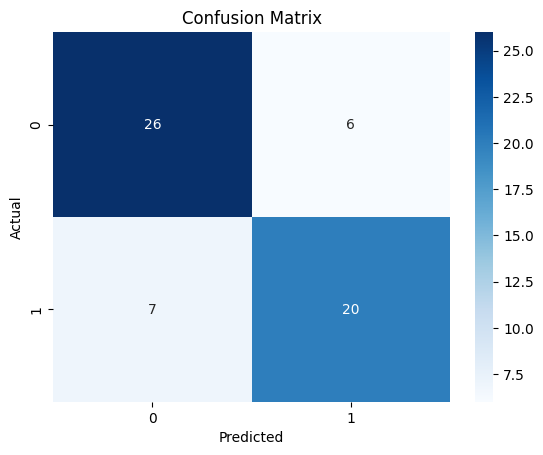

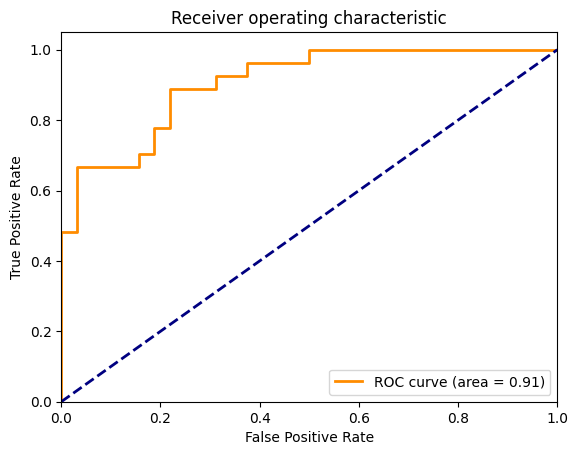

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        32
           1       0.77      0.74      0.75        27

    accuracy                           0.78        59
   macro avg       0.78      0.78      0.78        59
weighted avg       0.78      0.78      0.78        59


KNeighborsClassifier(metric='euclidean', n_neighbors=29)
prediction_time: 0.004870176315307617
Confusion matrix: 
[[28  4]
 [ 6 21]]


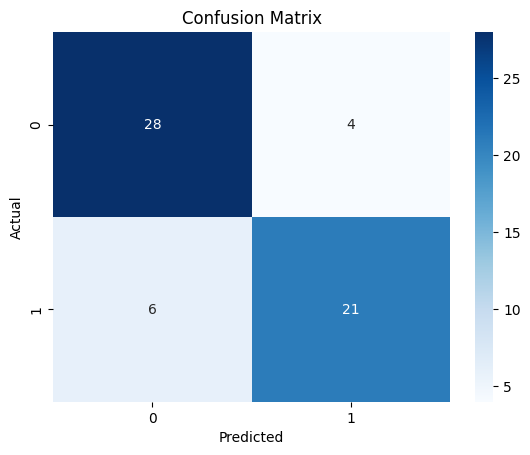

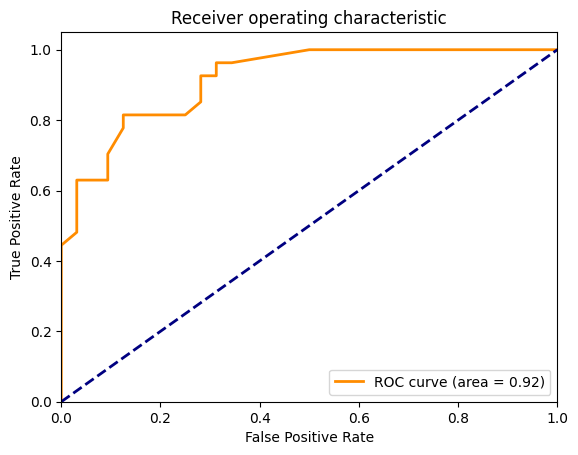

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.84      0.78      0.81        27

    accuracy                           0.83        59
   macro avg       0.83      0.83      0.83        59
weighted avg       0.83      0.83      0.83        59


SVC(C=70, gamma=0.04, probability=True, random_state=47)
prediction_time: 0.0018398761749267578
Confusion matrix: 
[[32  0]
 [ 1 26]]


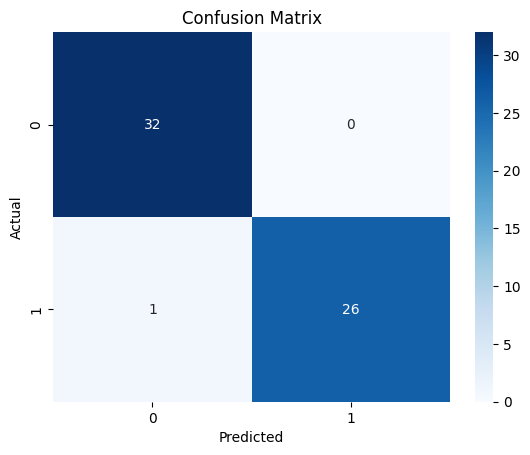

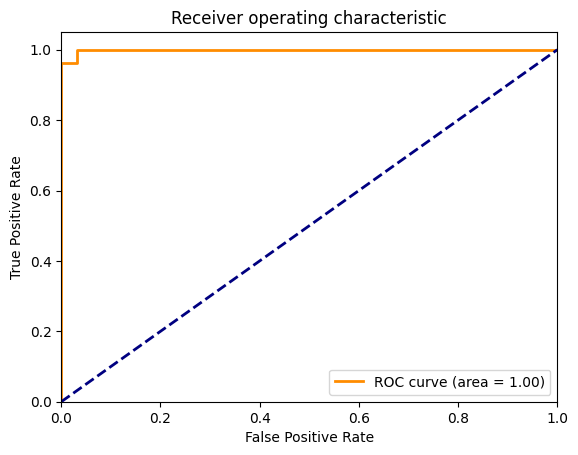

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.96      0.98        27

    accuracy                           0.98        59
   macro avg       0.98      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59


RandomForestClassifier(criterion='entropy', max_features=10, random_state=47)
prediction_time: 0.011948823928833008
Confusion matrix: 
[[32  0]
 [ 2 25]]


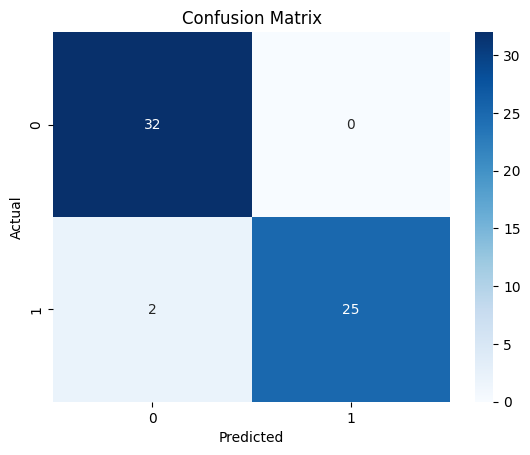

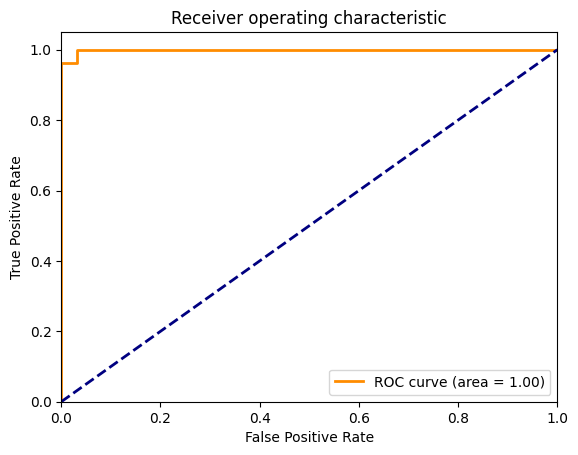

Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        32
           1       1.00      0.93      0.96        27

    accuracy                           0.97        59
   macro avg       0.97      0.96      0.97        59
weighted avg       0.97      0.97      0.97        59


StackingClassifier(estimators=[('clf1',
                                LogisticRegression(random_state=47,
                                                   solver='newton-cg')),
                               ('clf2',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=29,
                                                     weights='distance')),
                               ('clf3',
                                DecisionTreeClassifier(max_depth=8,
                                                       min_samples_split=4,
                            

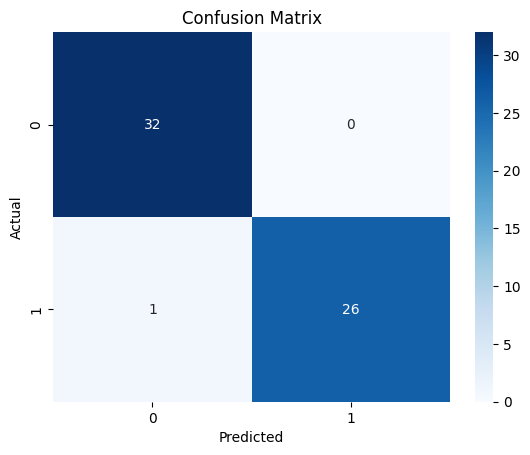

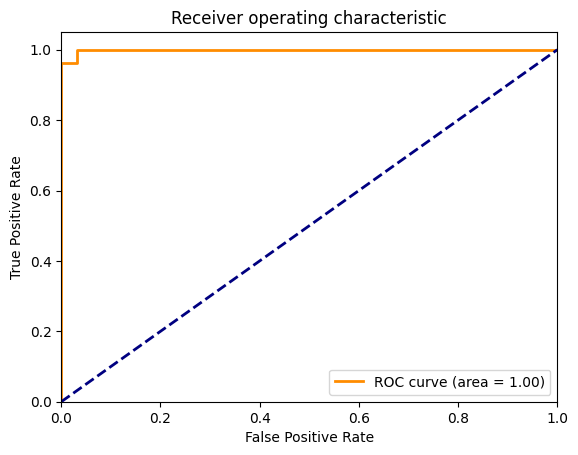

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.96      0.98        27

    accuracy                           0.98        59
   macro avg       0.98      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59




In [ ]:
X_train, X_test, y_train, y_test=predictmodels(scale_over,y_over)

In [ ]:
Gridsrch(RandomForestClassifier(random_state=3),1)
Gridsrch(StackingClassifier(estimators=[('clf1', LogisticRegression(random_state=47)),
                               ('clf2',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=29)),
                               ('clf3', DecisionTreeClassifier()),
                               ('clf4', SVC(C=27, gamma=0.05, random_state=47)),
                               ('clf5', GaussianNB()),
                               ('clf6',
                                MLPRegressor(hidden_layer_sizes=(64, 32),
                                             max_iter=1000)),
                               ('clf7',
                                MLPRegressor(hidden_layer_sizes=(128, 64),
                                             max_iter=1000))],
                   final_estimator=SVC(C=2, gamma=0.05, random_state=47)),2)

RandomForestClassifier(random_state=3) fbeta_score is  0.9842519685039369
RandomForestClassifier(random_state=3) Accuracy is  0.9661016949152542
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        32
           1       1.00      0.93      0.96        27

    accuracy                           0.97        59
   macro avg       0.97      0.96      0.97        59
weighted avg       0.97      0.97      0.97        59

{'min_samples_leaf': 2, 'n_estimators': 120}
StackingClassifier(estimators=[('clf1', LogisticRegression(random_state=47)),
                               ('clf2',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=29)),
                               ('clf3', DecisionTreeClassifier()),
                               ('clf4', SVC(C=27, gamma=0.05, random_state=47)),
                               ('clf5', GaussianNB()),
                  

GridSearchCV(estimator=StackingClassifier(estimators=[('clf1',
                                                       LogisticRegression(random_state=47)),
                                                      ('clf2',
                                                       KNeighborsClassifier(metric='euclidean',
                                                                            n_neighbors=29)),
                                                      ('clf3',
                                                       DecisionTreeClassifier()),
                                                      ('clf4',
                                                       SVC(C=27, gamma=0.05,
                                                           random_state=47)),
                                                      ('clf5', GaussianNB()),
                                                      ('clf6',
                                                       MLPRegressor(hidden_layer_sizes=(64,
                                                                                        32),
                                                                    max_iter=1000)),
                                                      ('clf7',
                                                       MLPRegressor...
                                          DecisionTreeClassifier(max_depth=8,
                                                                 min_samples_split=4,
                                                                 random_state=47)),
                                         ('clf4',
                                          SVC(C=70, degree=2, random_state=47)),
                                         ('clf5', GaussianNB()),
                                         ('clf6',
                                          MLPRegressor(hidden_layer_sizes=(64,
                                                                           32),
                                                       max_iter=1000)),
                                         ('clf7',
                                          MLPRegressor(hidden_layer_sizes=(128,
                                                                           64),
                                                       max_iter=1000))]],
                         'final_estimator': [SVC(C=2, gamma=0.05,
                                                 random_state=47)]},
             scoring=make_scorer(fbeta_score, beta=0.1))

fbeta score using Scale Oversampling : 0.9842519685039369

Training set has 76 samples.
Testing set has 20 samples.

RandomForestClassifier(random_state=3)
prediction_time: 0.010137557983398438
Confusion matrix: 
[[10  0]
 [ 2  8]]


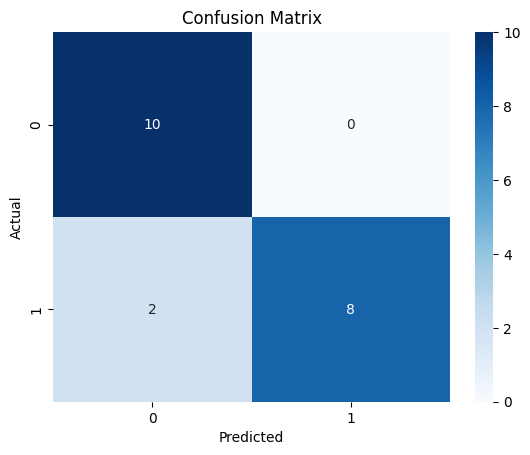

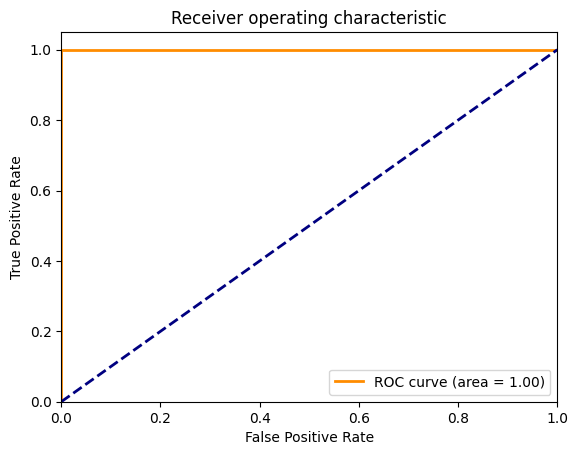

Classification Report
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20


DecisionTreeClassifier(random_state=3)
prediction_time: 0.001196146011352539
Confusion matrix: 
[[ 9  1]
 [ 0 10]]


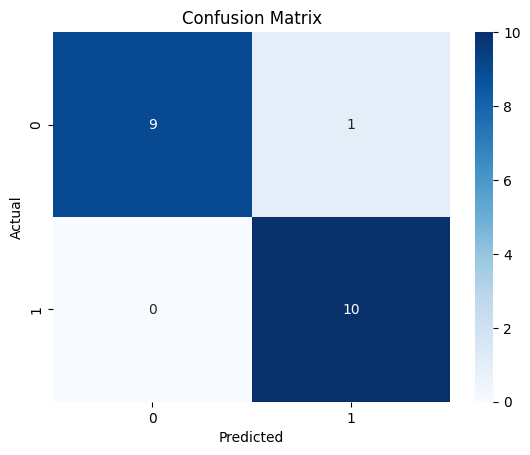

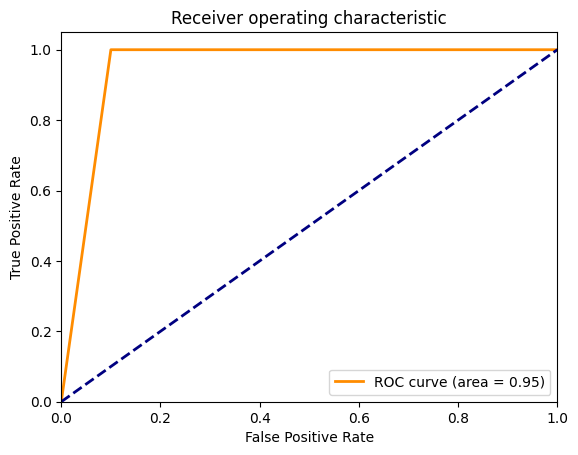

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20


AdaBoostClassifier(random_state=3)
prediction_time: 0.007910490036010742
Confusion matrix: 
[[ 9  1]
 [ 0 10]]


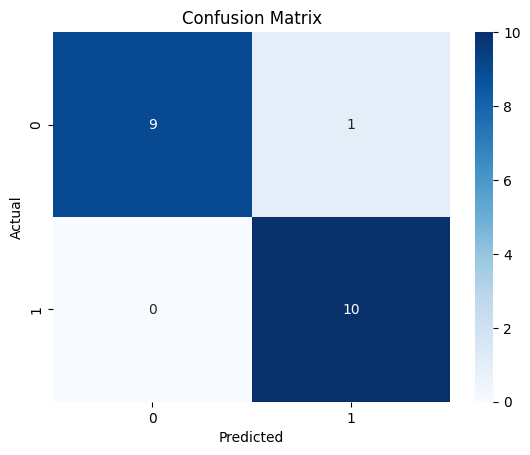

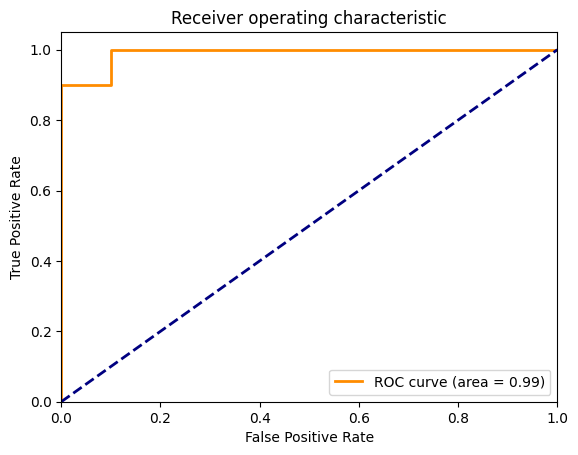

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20


LogisticRegression(random_state=3)
prediction_time: 0.0014879703521728516
Confusion matrix: 
[[8 2]
 [1 9]]


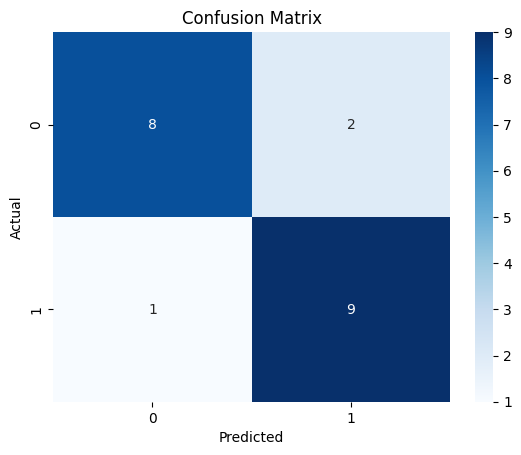

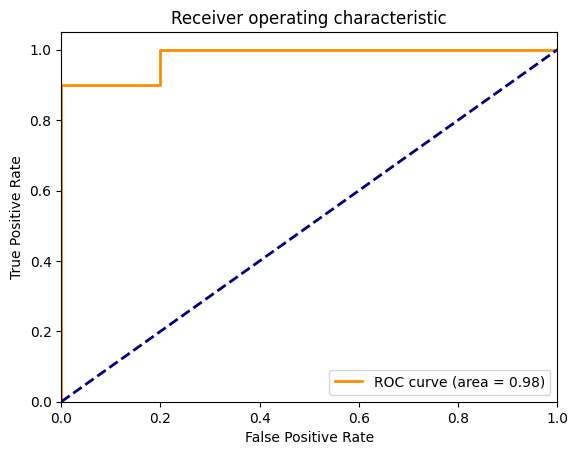

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.82      0.90      0.86        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20


KNeighborsClassifier(metric='euclidean', n_neighbors=29)
prediction_time: 0.007052183151245117
Confusion matrix: 
[[8 2]
 [2 8]]


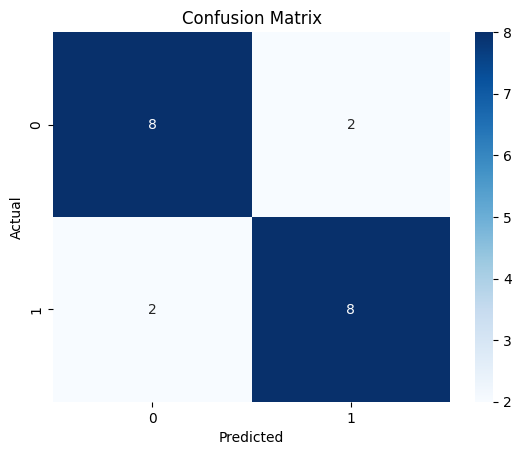

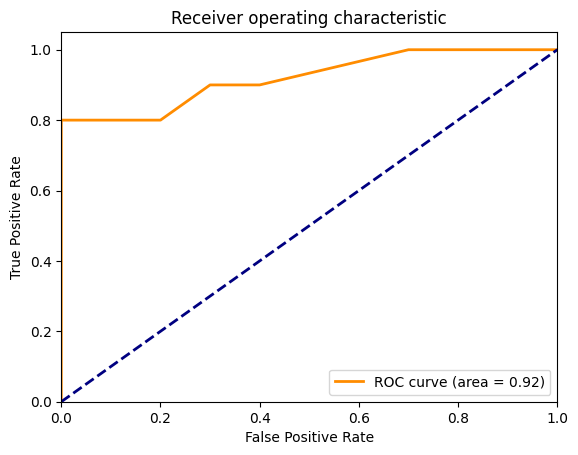

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.80      0.80      0.80        10

    accuracy                           0.80        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.80      0.80      0.80        20


SVC(C=70, gamma=0.04, probability=True, random_state=47)
prediction_time: 0.0015528202056884766
Confusion matrix: 
[[9 1]
 [5 5]]


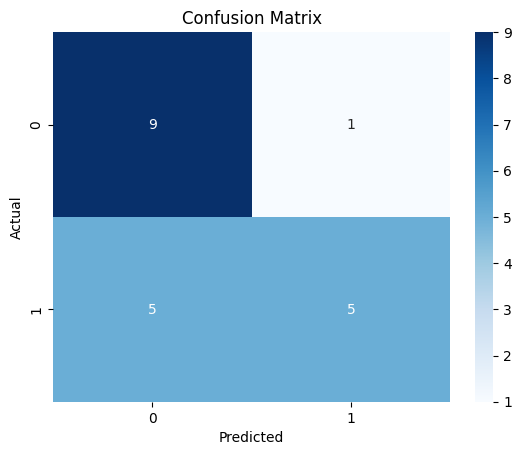

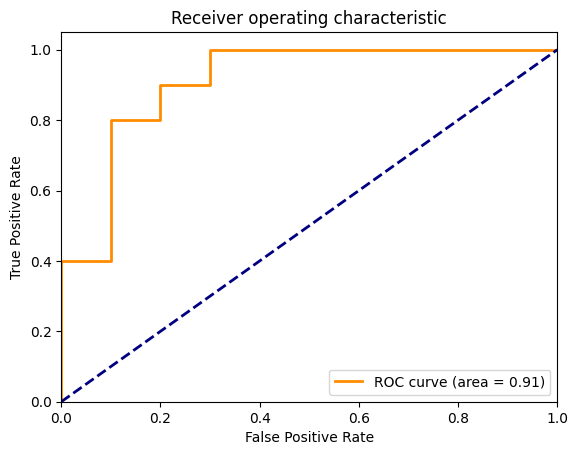

Classification Report
              precision    recall  f1-score   support

           0       0.64      0.90      0.75        10
           1       0.83      0.50      0.62        10

    accuracy                           0.70        20
   macro avg       0.74      0.70      0.69        20
weighted avg       0.74      0.70      0.69        20


RandomForestClassifier(criterion='entropy', max_features=10, random_state=47)
prediction_time: 0.01194143295288086
Confusion matrix: 
[[10  0]
 [ 1  9]]


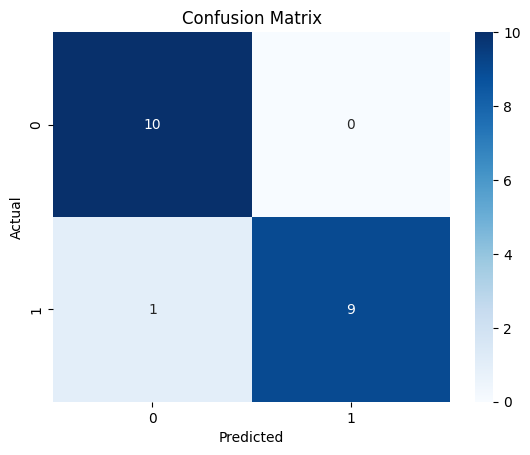

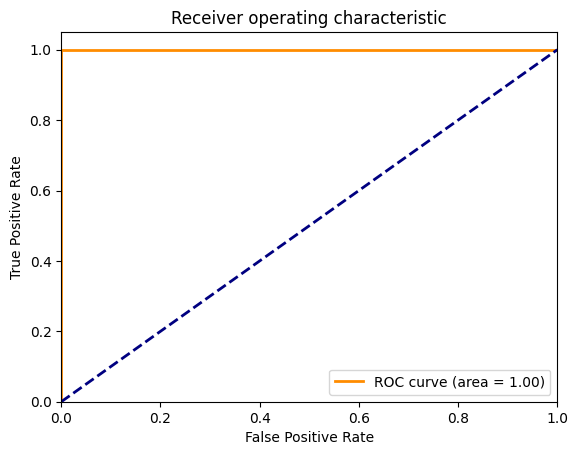

Classification Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20


StackingClassifier(estimators=[('clf1',
                                LogisticRegression(random_state=47,
                                                   solver='newton-cg')),
                               ('clf2',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=29,
                                                     weights='distance')),
                               ('clf3',
                                DecisionTreeClassifier(max_depth=8,
                                                       min_samples_split=4,
                            

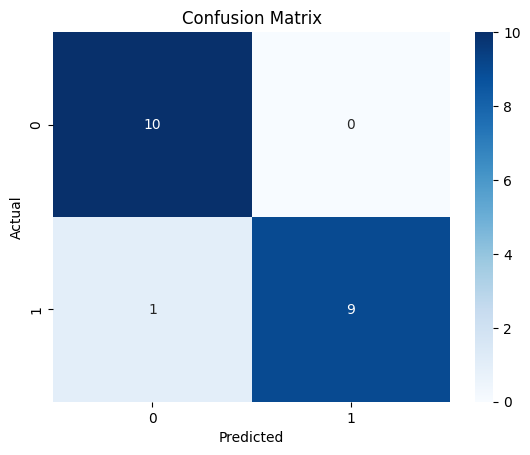

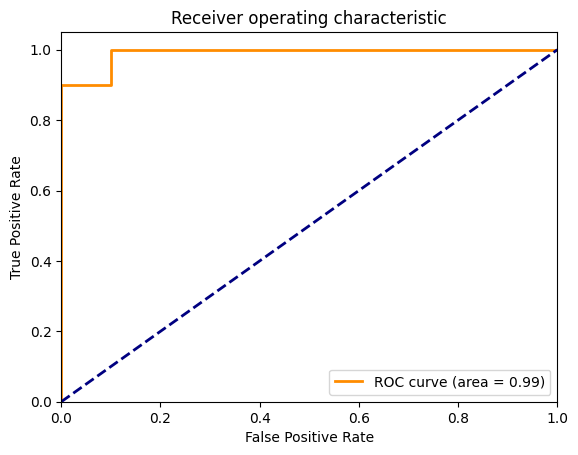

Classification Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20




In [ ]:
X_train, X_test, y_train, y_test=predictmodels(scale_under,y_under)

In [ ]:
Gridsrch(RandomForestClassifier(random_state=3),1)
Gridsrch(StackingClassifier(estimators=[('clf1', LogisticRegression(random_state=47)),
                               ('clf2',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=29)),
                               ('clf3', DecisionTreeClassifier()),
                               ('clf4', SVC(C=27, gamma=0.05, random_state=47)),
                               ('clf5', GaussianNB()),
                               ('clf6',
                                MLPRegressor(hidden_layer_sizes=(64, 32),
                                             max_iter=1000)),
                               ('clf7',
                                MLPRegressor(hidden_layer_sizes=(128, 64),
                                             max_iter=1000))],
                   final_estimator=SVC(C=2, gamma=0.05, random_state=47)),2)

RandomForestClassifier(random_state=3) fbeta_score is  0.9523809523809523
RandomForestClassifier(random_state=3) Accuracy is  0.9
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20

{'min_samples_leaf': 3, 'n_estimators': 150}
StackingClassifier(estimators=[('clf1', LogisticRegression(random_state=47)),
                               ('clf2',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=29)),
                               ('clf3', DecisionTreeClassifier()),
                               ('clf4', SVC(C=27, gamma=0.05, random_state=47)),
                               ('clf5', GaussianNB()),
                               ('

GridSearchCV(estimator=StackingClassifier(estimators=[('clf1',
                                                       LogisticRegression(random_state=47)),
                                                      ('clf2',
                                                       KNeighborsClassifier(metric='euclidean',
                                                                            n_neighbors=29)),
                                                      ('clf3',
                                                       DecisionTreeClassifier()),
                                                      ('clf4',
                                                       SVC(C=27, gamma=0.05,
                                                           random_state=47)),
                                                      ('clf5', GaussianNB()),
                                                      ('clf6',
                                                       MLPRegressor(hidden_layer_sizes=(64,
                                                                                        32),
                                                                    max_iter=1000)),
                                                      ('clf7',
                                                       MLPRegressor...
                                          DecisionTreeClassifier(max_depth=8,
                                                                 min_samples_split=4,
                                                                 random_state=47)),
                                         ('clf4',
                                          SVC(C=70, degree=2, random_state=47)),
                                         ('clf5', GaussianNB()),
                                         ('clf6',
                                          MLPRegressor(hidden_layer_sizes=(64,
                                                                           32),
                                                       max_iter=1000)),
                                         ('clf7',
                                          MLPRegressor(hidden_layer_sizes=(128,
                                                                           64),
                                                       max_iter=1000))]],
                         'final_estimator': [SVC(C=2, gamma=0.05,
                                                 random_state=47)]},
             scoring=make_scorer(fbeta_score, beta=0.1))

highest fbeta Score using Scale Undersampling: 0.9782608695652175



In [ ]:
results = pd.DataFrame()
results['Model']=['SMOTE','Oversampling','Undersampling']
results['fb-Score']=[0.9541984732824427,0.9842519685039369,0.9782608695652175]

results.sort_values(by='fb-Score',ascending=False)

,Model,fb-Score
1,Oversampling,0.984252
2,Undersampling,0.978261
0,SMOTE,0.954198


Training set has 235 samples.
Testing set has 59 samples.

RandomForestClassifier(random_state=3)
prediction_time: 0.01172947883605957
Confusion matrix: 
[[32  0]
 [ 2 25]]


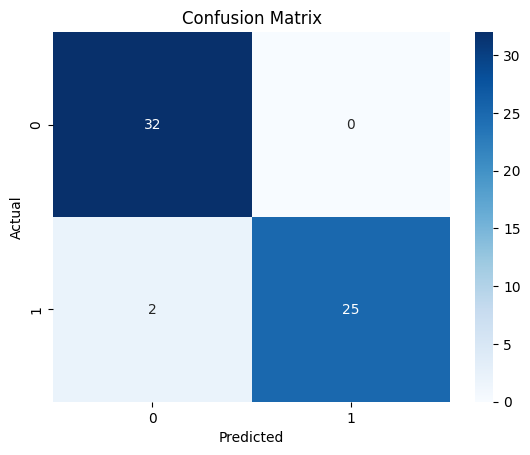

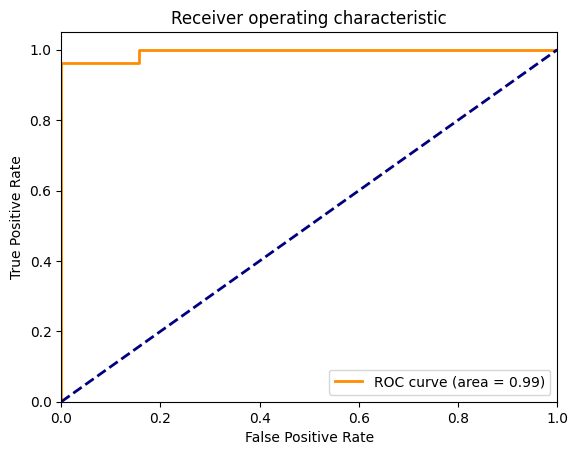

Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        32
           1       1.00      0.93      0.96        27

    accuracy                           0.97        59
   macro avg       0.97      0.96      0.97        59
weighted avg       0.97      0.97      0.97        59


DecisionTreeClassifier(random_state=3)
prediction_time: 0.001359701156616211
Confusion matrix: 
[[32  0]
 [ 4 23]]


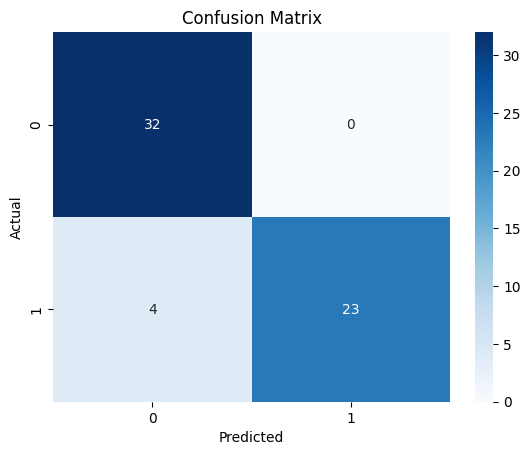

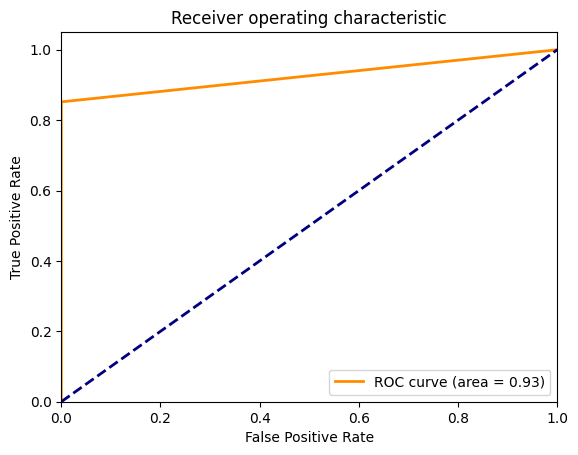

Classification Report
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        32
           1       1.00      0.85      0.92        27

    accuracy                           0.93        59
   macro avg       0.94      0.93      0.93        59
weighted avg       0.94      0.93      0.93        59


AdaBoostClassifier(random_state=3)
prediction_time: 0.010207891464233398
Confusion matrix: 
[[32  0]
 [ 2 25]]


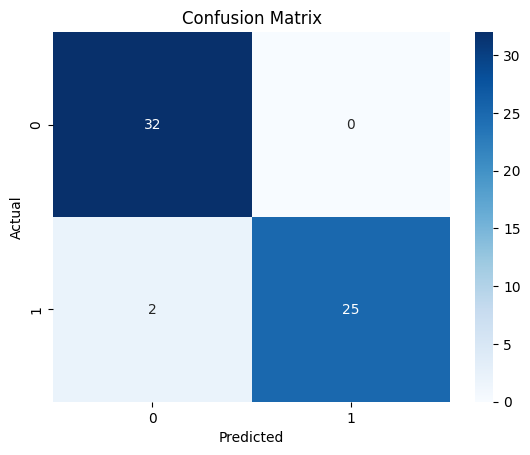

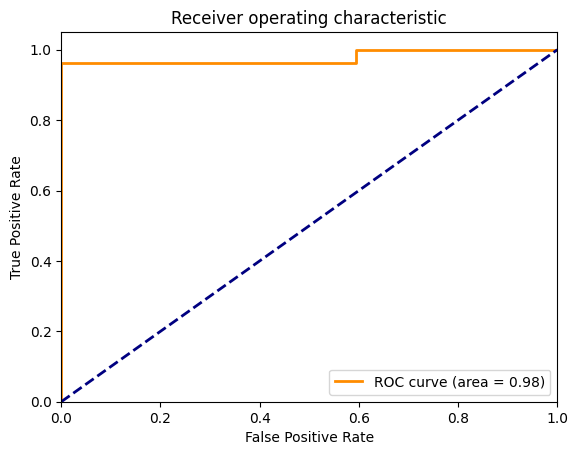

Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        32
           1       1.00      0.93      0.96        27

    accuracy                           0.97        59
   macro avg       0.97      0.96      0.97        59
weighted avg       0.97      0.97      0.97        59


LogisticRegression(random_state=3)
prediction_time: 0.001466989517211914
Confusion matrix: 
[[25  7]
 [ 7 20]]


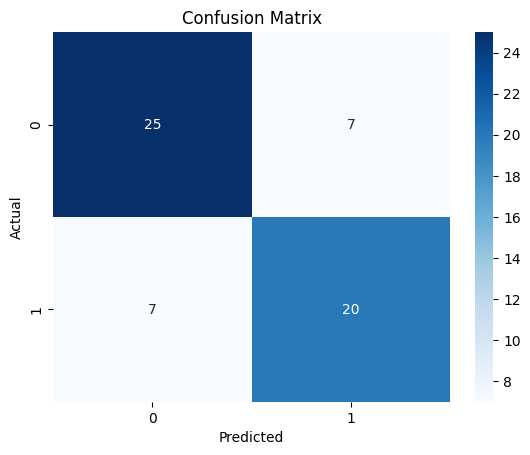

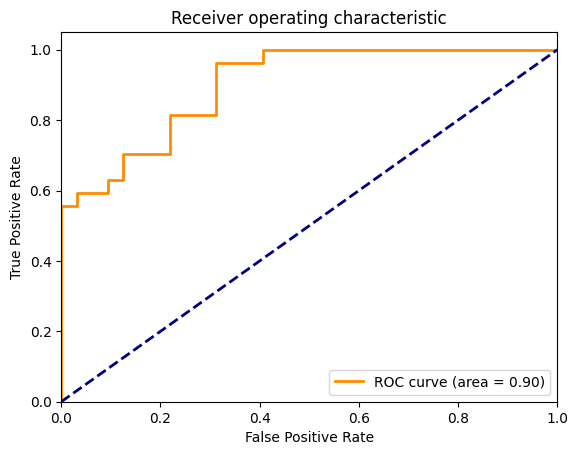

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        32
           1       0.74      0.74      0.74        27

    accuracy                           0.76        59
   macro avg       0.76      0.76      0.76        59
weighted avg       0.76      0.76      0.76        59


KNeighborsClassifier(metric='euclidean', n_neighbors=29)
prediction_time: 0.020209312438964844
Confusion matrix: 
[[24  8]
 [ 6 21]]


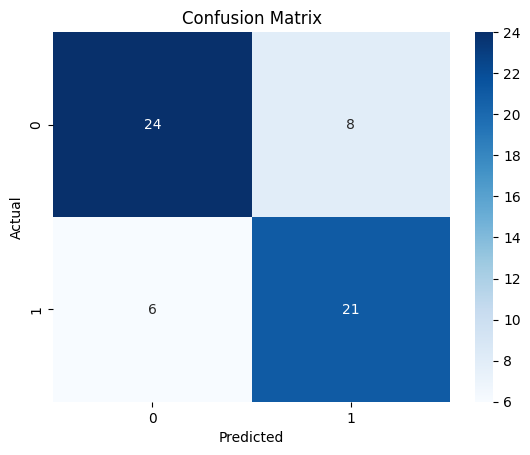

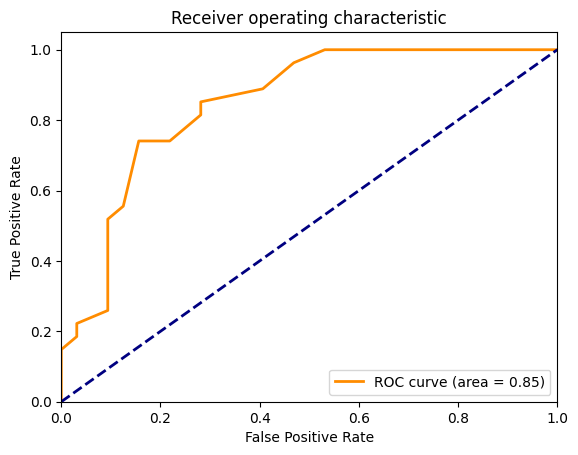

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        32
           1       0.72      0.78      0.75        27

    accuracy                           0.76        59
   macro avg       0.76      0.76      0.76        59
weighted avg       0.77      0.76      0.76        59


SVC(C=70, gamma=0.04, probability=True, random_state=47)
prediction_time: 0.002335786819458008
Confusion matrix: 
[[29  3]
 [ 0 27]]


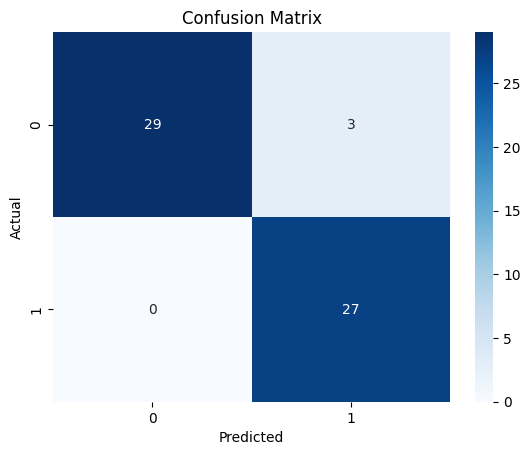

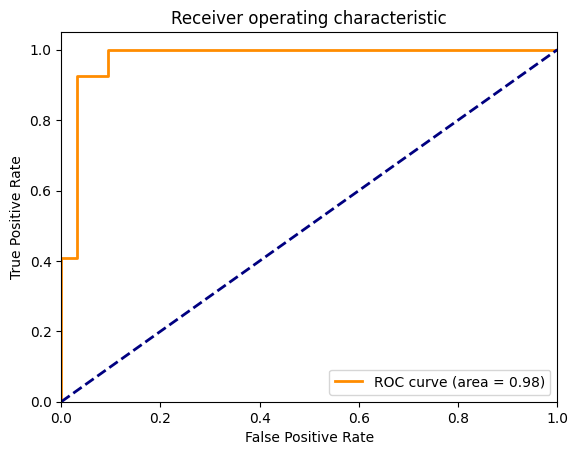

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        32
           1       0.90      1.00      0.95        27

    accuracy                           0.95        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.95      0.95      0.95        59


RandomForestClassifier(criterion='entropy', max_features=10, random_state=47)
prediction_time: 0.01641106605529785
Confusion matrix: 
[[32  0]
 [ 2 25]]


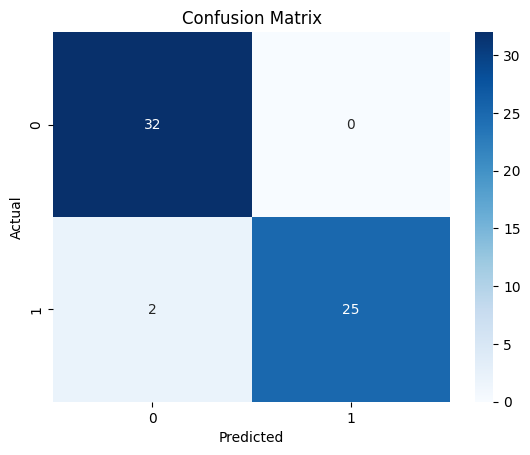

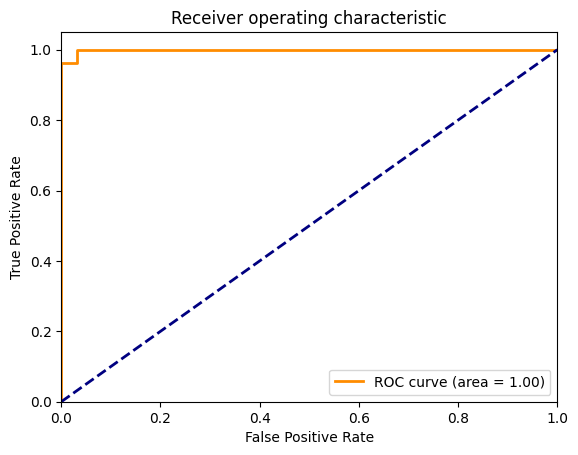

Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        32
           1       1.00      0.93      0.96        27

    accuracy                           0.97        59
   macro avg       0.97      0.96      0.97        59
weighted avg       0.97      0.97      0.97        59


StackingClassifier(estimators=[('clf1',
                                LogisticRegression(random_state=47,
                                                   solver='newton-cg')),
                               ('clf2',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=29,
                                                     weights='distance')),
                               ('clf3',
                                DecisionTreeClassifier(max_depth=8,
                                                       min_samples_split=4,
                            

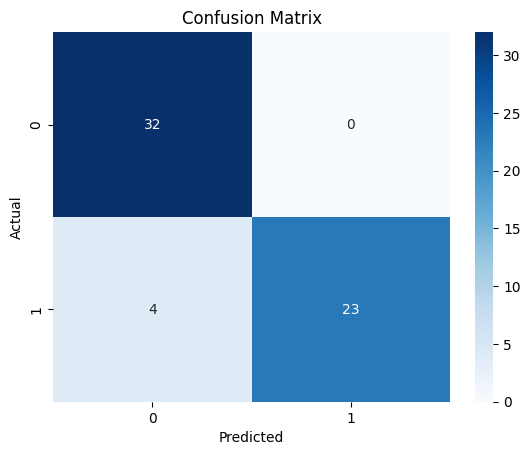

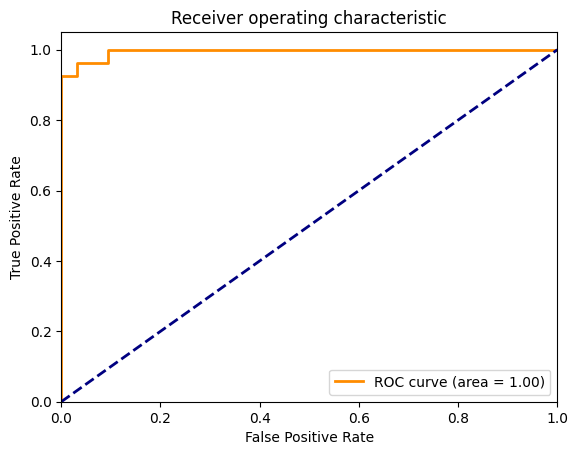

Classification Report
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        32
           1       1.00      0.85      0.92        27

    accuracy                           0.93        59
   macro avg       0.94      0.93      0.93        59
weighted avg       0.94      0.93      0.93        59




In [ ]:
X_train, X_test, y_train, y_test=predictmodels(X_over,y_over)

Using ADA boost Classifier on non-scaled or normalized over sampled data

In [ ]:
best=Gridsrch(AdaBoostClassifier(random_state=3),3)

AdaBoostClassifier(random_state=3) fbeta_score is  0.9923664122137406
AdaBoostClassifier(random_state=3) Accuracy is  0.9830508474576272
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.96      0.98        27

    accuracy                           0.98        59
   macro avg       0.98      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59

{'learning_rate': 1.2, 'n_estimators': 200}


Highest FB score using ADA boost classifier on Over Sampled Data:0.9923664122137406



In [ ]:
estimator=best.best_estimator_


In [ ]:
preds=estimator.predict(X_test)


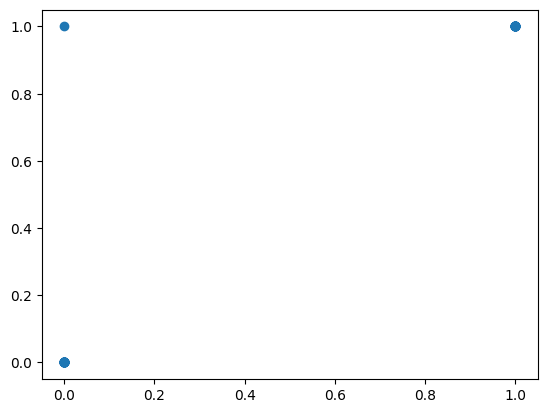

In [ ]:
plt.scatter(x=preds,y=y_test)


In [ ]:
df_pf = pd.DataFrame(preds, columns=['Predictions'])
df_pf['Targets'] = y_test.reset_index(drop=True)
df_pf.loc[df_pf['Predictions']!=df_pf['Targets']]

,Predictions,Targets
30,0,1


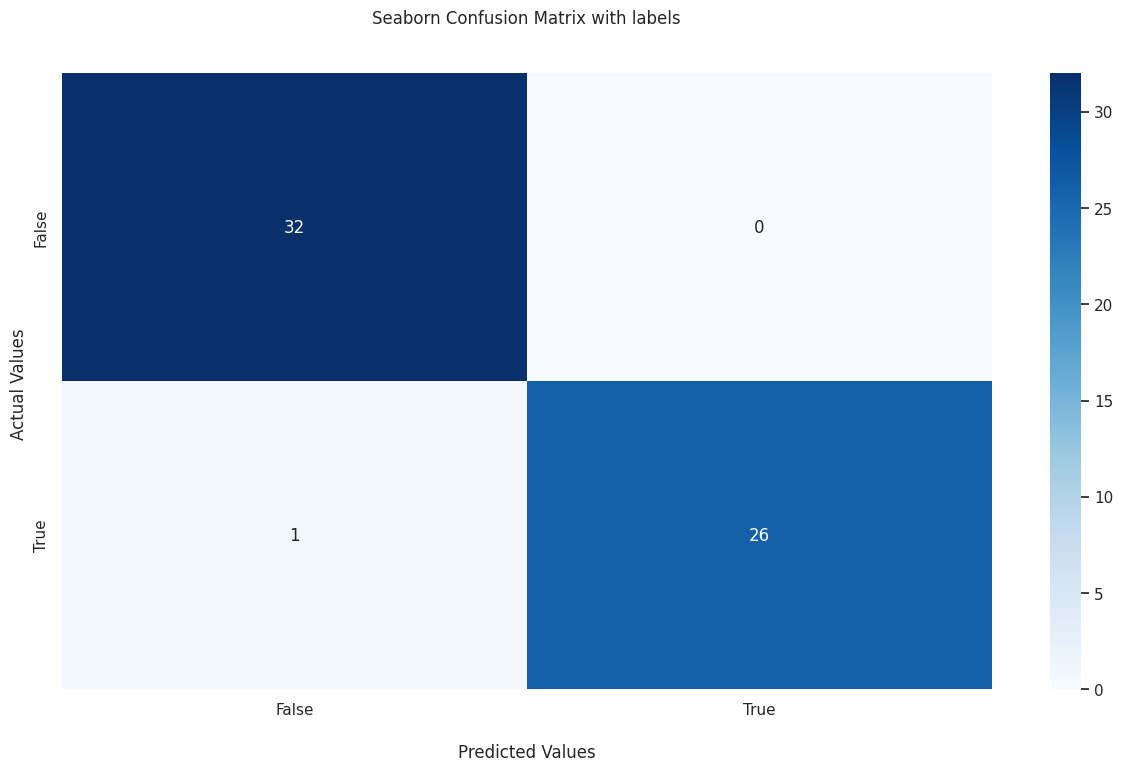

In [ ]:
cm=confusion_matrix(y_test,preds)
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

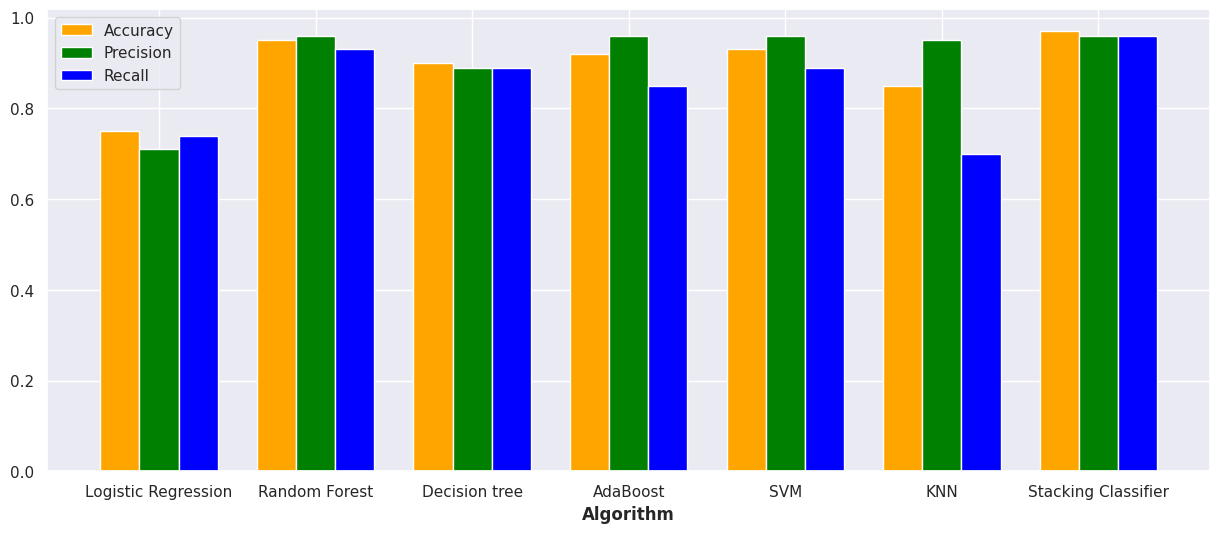

In [ ]:
algorithms = ['Logistic Regression', 'Random Forest',  'Decision tree', 'AdaBoost', 'SVM' ,'KNN','Stacking Classifier']

# accuracy scores for each algorithm
accuracy_scores = [.75,.95,.90,.92,.93,.85,.97]

# precision scores for each algorithm
precision_scores = [.71,.96,.89,.96,.96,.95, .96 ]

# recall scores for each algorithm
recall_scores = [.74 ,.93 ,.89 ,.85 ,.89 ,.70, .96 ]
# set the figure size
plt.figure(figsize=(15, 6))
# set width of bar
bar_width = 0.25

# set positions of bars on x-axis
r1 = np.arange(len(algorithms))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# plot bars for accuracy scores
plt.bar(r1, accuracy_scores, color='orange', width=bar_width, edgecolor='white', label='Accuracy')

# plot bars for precision scores
plt.bar(r2, precision_scores, color='green', width=bar_width, edgecolor='white', label='Precision')

# plot bars for recall scores
plt.bar(r3, recall_scores, color='blue', width=bar_width, edgecolor='white', label='Recall')

# add xticks on the middle of the group bars
plt.xlabel('Algorithm', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(algorithms))], algorithms)

# add legend
plt.legend()

# show the plot
plt.show()

Making Prediction system

In [ ]:
# input_data = (197.07600,206.89600,192.05500,0.00001,0.00166,0.00168,0.00498,0.09700,0.00563,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# # changing input data to a numpy array
# input_data_as_numpy_array = np.asarray(input_data)

# # reshape the numpy array
# input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
# # from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# # standardize the data
# std_data = scaler.transform(input_data_reshaped)
# Stack_model = StackingClassifier(estimators=[('clf1', clf1), ('clf2', clf2),('clf3', clf3),('clf4', clf4),('clf5', clf5),('clf6', clf6),('clf7', clf7),],
#     final_estimator=meta_clf)
# prediction =Stack_model.predict(std_data)
# print(prediction)


# if (prediction[0] == 0):
#   print("The Person does not have Parkinsons Disease")

# else:
#   print("The Person has Parkinsons")


In [ ]:
pip install streamlit


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 57.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 90.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=5440399b48a8cf4a2ad170ccd8ccfc7e882735b307041215555ba7edd34bc68e
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators


In [ ]:
%%writefile myapp.py
import streamlit as st
from sklearn.model_selection   import train_test_split 
st.title("My Streamlit App")
from sklearn.linear_model  import LogisticRegression    # For logistic Regression
from sklearn.naive_bayes  import GaussianNB            # For Naive Bayes classifier
from sklearn.neighbors    import KNeighborsClassifier  # For K-NN Classifier
from sklearn.svm  import SVC                   # For support vector machine based classifier

## Scaling
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neural_network import MLPRegressor
import os

import numpy as np
import pickle
import streamlit as st
import pandas as pd
## Scaling
from sklearn.preprocessing import StandardScaler



pdDataOrg = pd.read_csv("/content/Parkinsson_disease.csv") 
#               # inserting target column to last column

# # deleting variables that were used for changing column position of target column
# pdDataOrg = pd.read_csv("/content/Parkinsson_disease.csv") 
# pdData = pdDataOrg.copy()                                               # creating a copy of loanDataOrg into loanData
# pdData.set_index('name',inplace=True)

# targetCol = 'status'                                                    # defining target column
# targetColDf = pdData.pop(targetCol)                                     # popping target column from loanData df
# pdData.insert(len(pdData.columns),targetCol, targetColDf)               # inserting target column to last column

# # deleting variables that were used for changing column position of target column
# del targetCol 
# del targetColDf
# X = pdData.drop(['status'],axis=1)
# y = pdData['status']
# # split data into train subset and test subset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

# # Let us scale train as well as test data using StandardScaler
# scaler = StandardScaler()

# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)

# #loaded_model=pickle.load(open('/content/trained_model.sav','rb'))
# clf1 = LogisticRegression(random_state=47,solver='newton-cg')
# clf2 = KNeighborsClassifier(n_neighbors = 29, weights = 'distance', metric='euclidean')
# clf3 =  DecisionTreeClassifier(criterion= 'gini', max_depth= 8, min_samples_leaf= 1, min_samples_split= 4,random_state=47 )
# clf4 = SVC(gamma='scale', C=70,random_state=47,kernel='rbf',degree=2)
# clf5 = GaussianNB()
# clf6 = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=1000)
# clf7 = MLPRegressor(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=1000)

# # Define the meta-classifier
# meta_clf = SVC(gamma=0.05, C=2,random_state=47)


# # define the stacking ensemble with cross validation of 5
# Stack_model = StackingClassifier(estimators=[('clf1', clf1), ('clf2', clf2),('clf3', clf3),('clf4', clf4),('clf5', clf5),('clf6', clf6),('clf7', clf7),],
#     final_estimator=meta_clf)
# # predict the response
# Stack_model.fit(X_train_scaled, y_train)
# prediction_Stack = Stack_model.predict(X_test_scaled)

# #input_data = (197.07600,206.89600,192.05500,0.00001,0.00166,0.00168,0.00498,0.09700,0.00563,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# def parkinson_det(input_data):
#     input_data_as_numpy_array = np.asarray(input_data)

#     # reshape the numpy array
#     input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#     scaler = StandardScaler()
#     # standardize the data
#     std_data = scaler.transform(input_data_reshaped)

#     prediction =Stack_model.predict(std_data)
#     print(prediction)


#     if (prediction[0] == 0):
#         return "The Person does not have Parkinsons Disease"

#     else:
#         return"The Person has Parkinsons"
    





# def main():
#     st.title("Parkinson's disease detection web app")
#     mdvp_fo_hz=st.text_input("mdvp_fo_hz")
#     mdvp_fhi_hz = st.text_input("mdvp_fhi_hz")
#     mdvp_flo_hz= st.text_input("mdvp_flo_hz")
#     mdvp_jitter_abs = st.text_input("mdvp_jitter_abs")
#     mdvp_rap = st.text_input("mdvp_rap")
#     mdvp_ppq = st.text_input("mdvp_ppq")
#     jitter_ddp = st.text_input("jitter_ddp")
#     mdvp_shimmer_db = st.text_input("mdvp_shimmer_db")
#     shimmer_apq3 = st.text_input("shimmer_apq3")
#     shimmer_apq5 = st.text_input("shimmer_apq5")
#     mdvp_apq= st.text_input("mdvp_apq")
#     shimmer_dda = st.text_input("shimmer_dda")
#     nhr = st.text_input("nhr")
#     rpde = st.text_input("rpde")
#     dfa  = st.text_input("dfa")
#     spread1=st.text_input("spread1")
#     spread2  = st.text_input("spread2")
#     d2  = st.text_input("d2")
#     ppe=st.text_input("ppe")
    
    
# #code for prediction
#     diag=''
    
#     #creating a button
#     if st.button("Test Result"):
#         diag=parkinson_det([mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_jitter_abs,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer_db,shimmer_apq3,shimmer_apq5,mdvp_apq,shimmer_dda,nhr,rpde,dfa,spread1,spread2,d2,ppe])
#     st.success(diag)




# if __name__ =='__main__':
#     main()

import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPRegressor
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


@st.cache(allow_output_mutation=True)
def load_data():
    pdDataOrg = pd.read_csv("/content/Parkinsson_disease.csv")
    pdData = pdDataOrg.copy()
    pdData.set_index('name', inplace=True)
    targetCol = 'status'
    targetColDf = pdData.pop(targetCol)
    pdData.insert(len(pdData.columns), targetCol, targetColDf)
    X = pdData.drop(['status'], axis=1)
    y = pdData['status']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, y_train, y_test


@st.cache(allow_output_mutation=True)
def build_model():
    clf1 = LogisticRegression(random_state=47, solver='newton-cg')
    clf2 = KNeighborsClassifier(n_neighbors=29, weights='distance', metric='euclidean')
    clf3 = DecisionTreeClassifier(criterion='gini', max_depth=8, min_samples_leaf=1, min_samples_split=4, random_state=47)
    clf4 = SVC(gamma='scale', C=70, random_state=47, kernel='rbf', degree=2)
    clf5 = GaussianNB()
    clf6 = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=1000)
    clf7 = MLPRegressor(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=1000)
    meta_clf = SVC(gamma=0.05, C=2, random_state=47)
    stack_model = StackingClassifier(estimators=[('clf1', clf1), ('clf2', clf2), ('clf3', clf3),
                                                  ('clf4', clf4), ('clf5', clf5), ('clf6', clf6),
                                                  ('clf7', clf7)], final_estimator=meta_clf)
    return stack_model


def parkinson_det(input_data, model):
    input_data_as_numpy_array = np.asarray(input_data)
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
    scaler = StandardScaler()
    std_data = scaler.fit_transform(input_data_reshaped)
    prediction = model.predict(std_data)
    if prediction[0] == 0:
        return "The Person does not have Parkinson's Disease"
    else:
        return "The Person has Parkinson's"


def main():
    st.set_page_config(page_title="Parkinson's disease detection web app")
    st.title("Parkinson's disease detection web app")
    X_train_scaled, X_test_scaled, y_train, y_test = load_data()
    model = build_model()
    model.fit(X_train_scaled, y_train)
    features = list(X_train_scaled.columns)
    input_data = []
    mdvp_fo_hz=st.text_input("mdvp_fo_hz")
#     mdvp_fhi_hz = st.text_input("mdvp_fhi_hz")
#     mdvp_flo_hz= st.text_input("mdvp_flo_hz")
#     mdvp_jitter_abs = st.text_input("mdvp_jitter_abs")
#     mdvp_rap = st.text_input("mdvp_rap")
#     mdvp_ppq = st.text_input("mdvp_ppq")
#     jitter_ddp = st.text_input("jitter_ddp")
#     mdvp_shimmer_db = st.text_input("mdvp_shimmer_db")
#     shimmer_apq3 = st.text_input("shimmer_apq3")
#     shimmer_apq5 = st.text_input("shimmer_apq5")
#     mdvp_apq= st.text_input("mdvp_apq")
#     shimmer_dda = st.text_input("shimmer_dda")
#     nhr = st.text_input("nhr")
#     rpde = st.text_input("rpde")
#     dfa  = st.text_input("dfa")
#     spread1=st.text_input("spread1")
#     spread2  = st.text_input("spread2")
#     d2  = st.text_input("d2")
#     ppe=st.text_input("ppe")
    
    
# #code for prediction
#     diag=''
    
#     #creating a button
#     if st.button("Test Result"):
#         diag=parkinson_det([mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_jitter_abs,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer_db,shimmer_apq3,shimmer_apq5,mdvp_apq,shimmer_dda,nhr,rpde,dfa,spread1,spread2,d2,ppe])
#     
        input_data.append(feat_val)
    if st.sidebar.button("Detect"):
        result = parkinson_det(input_data, model)
        st.write(result)





Writing myapp.py
